# A Primer on TensorFlow

We will learn about the following:
- TensorFlow
- Computational graphs and sessions
- Variables, constants, and placeholders
- TensorBoard
- Handwritten digit classification in TensorFlow
- Math operations in TensorFlow
- TensorFlow 2.0 and Keras

## What is TensorFlow ?

TensorFlow is an open source software library from Google, which is extensively used for numerical computation. It was originally developed by the researchers and engineers of the Google Brain team.

TensorFlow supports execution on everything, including CPUs, GPUs, TPUs, which are tensor processing units, and mobile and embedded platforms.

In TensorFlow, *every computation is represented by a data flow graph*, also known as a __computational graph__, where *nodes represent operations, such as addition or multiplication, and edges represent tensors*, and these are made with operations (also know as “ops”). So, when we work with TensorFlow, it is the same as *defining a series of operations in a Graph*.

Data flow graphs can also be shared and executed on many different platforms. TensorFlow provides a visualization tool, called TensorBoard, for visualizing data flow graphs.

TensorFlow 2.0 is the latest version of TensorFlow. However, it is important to understand how TensorFlow 1.x works. So, first, we will learn to use TensorFlow 1.x and then we will look into TensorFlow 2.0.

You can install TensorFlow easily through pip:

In [2]:
# !pip install tensorflow==1.13.1

  Stored in directory: C:\Users\Wisnu\AppData\Local\pip\Cache\wheels\7c\06\54\bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
Successfully built termcolor
  Found existing installation: protobuf 3.6.0
    Uninstalling protobuf-3.6.0:
      Successfully uninstalled protobuf-3.6.0


We can check the successful installation of TensorFlow by running the following simple Hello TensorFlow! program:

In [1]:
import tensorflow as tf

In [7]:
# Create a constant named "hello".
hello = tf.constant('Hello TensorFlow!')

# Create a session to execute the graph.
with tf.Session() as sess:
    print(sess.run(hello).decode('utf-8'))

AttributeError: module 'tensorflow' has no attribute 'Session'

## Understanding computational graphs and sessions

As we have learned, *every computation in TensorFlow is represented by a computational graph*. They consist of several __nodes and edges__, where *nodes are mathematical operations*, such as addition and multiplication, and *edges are tensors (multidimensional array)*. *Computational graphs are very efficient at optimizing resources and promote distributed computing.*

A computational graph consists of several TensorFlow operations, arranged in a graph of nodes.

A computational graph helps us to understand the network architecture when we work on building a really complex neural network. For instance, let's consider a simple layer, h = Relu(WX + b). Its computational graph would be represented as follows:

![](relu_wxb.jpg)

There are two types of dependency in the computational graph, called __direct and indirect dependency__. Say we have node b, the input of which is dependent on the output of node a; this type of dependency is called *direct dependency*, as shown in the following code:

In [5]:
a = tf.multiply(8,5)
b = tf.multiply(a,1)

When node b doesn't depend on node a for its input, it is called *indirect dependency*, as shown in the following code:

In [6]:
a = tf.multiply(8,5)
b = tf.multiply(4,3)

So, if we can understand these dependencies, we can distribute the independent computations in the available resources and reduce the computation time. *Whenever we import TensorFlow, a default graph is created automatically and all of the nodes we create are associated with the default graph*. We can also create our own graphs instead of using the default graph, and this is useful when building multiple models that do not depend on one another. A TensorFlow graph can be created using tf.Graph(), as follows:

    graph = tf.Graph()

    with graph.as_default():
        z = tf.add(x,y, name='Add')
        
If we want to clear the default graph (that is, if we want to clear the previously
defined variables and operations in the graph), then we can do this using 
    
    tf.reset_default_graph().

## Sessions

As mentioned in the previous section, a computational graph with operations on its nodes and tensors to its edges is created, and *in order to execute the graph, we use a __TensorFlow session__*.

A TensorFlow session can be created using tf.Session(), as shown in the following code:

    sess = tf.Session()    
    
After creating the session, we can execute our graph, using the : 

    sess.run()
    
Every computation in TensorFlow is represented by a computational graph, so we need to run a computational graph for everything. That is, in order to compute anything on TensorFlow, we need to create a TensorFlow session.

Let's execute the following code to multiply two numbers:

In [9]:
a = tf.multiply(3,3)
print(a)

tf.Tensor(9, shape=(), dtype=int32)


As we discussed earlier, whenever we import TensorFlow, a default computational graph is automatically created and all nodes are attached to the graph. Hence, when we print a, it just returns the TensorFlow object because the value for a is not computed yet, as the computation graph has not been executed.

In order to execute the graph, we need to initialize and run the TensorFlow session, as follows:

In [11]:
a = tf.multiply(3,3)

with tf.Session() as sess:
    print(sess.run(a))

AttributeError: module 'tensorflow' has no attribute 'Session'

To create two source operations which will output numbers we will define two constants:

In [12]:
a = tf.constant([2])
b = tf.constant([3])

After that, let's make an operation over these variables. The function tf.add() adds two elements:

In [13]:
c = tf.add(a,b)
#c = a + b is also a way to define the sum of the terms

Then TensorFlow needs to initialize a session to run our code. Sessions are, in a way, a context for creating a graph inside TensorFlow. Let's define our session:

In [14]:
sess = tf.Session()

AttributeError: module 'tensorflow' has no attribute 'Session'

Let's run the session to get the result from the previous defined 'c' operation:

In [15]:
result = sess.run(c)
print(result)

NameError: name 'sess' is not defined

Close the session to release resources:

In [16]:
sess.close()

NameError: name 'sess' is not defined

To avoid having to close sessions every time, we can define them in a with block, so after running the with block *the session will close automatically*:

In [17]:
with tf.Session() as sess:
    result = sess.run(c)
    print(result)

AttributeError: module 'tensorflow' has no attribute 'Session'

Even this silly example of adding 2 constants to reach a simple result defines the basis of TensorFlow. Define your edge (In this case our constants), include nodes (operations, like tf.add), and start a session to build a graph.

## What is the meaning of Tensor ?

The word __tensor__ from new latin means "*that which stretches*". It is a mathematical object that is named __tensor__ because an early application of tensors was *the study of materials stretching under tension*. The contemporary meaning of tensors can be taken as multidimensional arrays.

That's great, but... what are these multidimensional arrays?

Going back a little bit to physics to understand the concept of dimensions. The zero dimension can be seen as a point, a single object or a single item. The first dimension can be seen as a line, a one-dimensional array can be seen as numbers along this line, or as points along the line. One dimension can contain infinite zero dimension/points elements. The second dimension can be seen as a surface, a two-dimensional array can be seen as an infinite series of lines along an infinite line. The third dimension can be seen as volume, a three-dimensional array can be seen as an infinite series of surfaces along an infinite line. The Fourth dimension can be seen as the hyperspace or spacetime, a volume varying through time, or an infinite series of volumes along an infinite line. And so forth on...

![](tensor_example.jpg)

## Defining multidimensional arrays using TensorFlow

Now we will try to define such arrays using TensorFlow:

In [18]:
Scalar = tf.constant([2])
Vector = tf.constant([5,6,2])
Matrix = tf.constant([[1,2,3],[2,3,4],[3,4,5]])
Tensor = tf.constant([[[1,2,3],[2,3,4],[3,4,5]] , [[4,5,6],[5,6,7],[6,7,8]] , [[7,8,9],[8,9,10],[9,10,11]]])

with tf.Session() as session:
    result = session.run(Scalar)
    print('Scalar (1 entry):\n',result,'\n')
    result = session.run(Vector)
    print('Vector (3 entries):\n',result,'\n')
    result = session.run(Matrix)
    print('Matrix (3x3 entries):\n',result,'\n')
    result = session.run(Tensor)
    print('Tensor (3x3x3 entries):\n',result,'\n')

AttributeError: module 'tensorflow' has no attribute 'Session'

Now that you understand these data structures, I encourage you to play with them using some previous functions to see how they will behave, according to their structure types:

In [19]:
matrix_one = tf.constant([[1,2,3],[2,3,4],[3,4,5]])
matrix_two = tf.constant([[2,2,2],[2,2,2],[2,2,2]])

first_op = tf.add(matrix_one,matrix_two)
second_op = matrix_one + matrix_two

with tf.Session() as session:
    result = session.run(first_op)
    print('Defined using TensorFlow function:\n',result,'\n')
    result = session.run(second_op)
    print('Defined using normal expression:\n',result)

AttributeError: module 'tensorflow' has no attribute 'Session'

With the regular symbol definition and also the TensorFlow function we were able to get an element-wise multiplication, also known as Hadamard product.

But what if we want the regular matrix product?

We then need to use another TensorFlow function called tf.matmul():

In [20]:
Matrix_one = tf.constant([[2,3],[3,4]])
Matrix_two = tf.constant([[2,3],[3,4]])

first_op = tf.matmul(Matrix_one,Matrix_two)

with tf.Session() as session:
    result = session.run(first_op)
    print('Defined using TensorFlow function:\n',result)

AttributeError: module 'tensorflow' has no attribute 'Session'

We could also define this multiplication ourselves, but there is a function that already does that, so no need to reinvent the wheel!

## Why Tensor ?

The Tensor structure helps us by giving the freedom to shape the dataset the way we want.

And it is particularly helpful when dealing with images, due to the nature of how information in images are encoded,

Thinking about images, its easy to understand that it has a height and width, so it would make sense to represent the information contained in it with a two dimensional strucutre (a matrix)... until you remember that images have colors, and to add information about the colors, we need another dimension, and thats when Tensors become particulary helpful.

Images are encoded into color channels, the image data is represented into each color intensity in a color channel at a given point, the most common one being RGB, which means Red, Blue and Green. The information contained into an image is the intensity of each channel color into the width and height of the image.

So the intensity of the red channel at each point with width and height can be represented into a matrix, the same goes for the blue and green channels, so we end up having three matrices, and when these are combined they form a tensor.

## Variables, constants, and placeholders

Variables, constants, and placeholders are fundamental elements of TensorFlow. However, there is always confusion between these three. Let's look at each element, one by one, and learn the difference between them.

### Variables

__Variables__ are containers used to *store values*. Variables are used as input to several other operations in a computational graph. A variable can be created using the tf.Variable() function, as shown in the following code:

In [21]:
x = tf.Variable(13)

Let's create a variable called W, using tf.Variable(), as follows:

In [22]:
W = tf.Variable(tf.random_normal([500, 111], stddev=0.35), name='weights')

AttributeError: module 'tensorflow' has no attribute 'random_normal'

As you can see in the preceding code, we create a variable, W, by randomly drawing values from a normal distribution with a standard deviation of 0.35.

What is that name parameter in tf.Variable()?

It is used to set the name of the variable in the computational graph. So, in the preceding code, *Python saves the variable as W but in the TensorFlow graph, it will be saved as weights.*

After defining a variable, we need to *initialize all of the variables in the computational graph*. That can be done using 

    tf.global_variables_initializer()
    
Once we create a session, we run the initialization operation, which initializes all of the defined variables, and only then can we run the other operations, as shown in the following code:

In [23]:
x = tf.Variable(1212)
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print(sess.run(x))

AttributeError: module 'tensorflow' has no attribute 'global_variables_initializer'

To *update* the value of a variable, we simply run an *assign* operation that assigns a value to the variable:

In [24]:
state = tf.Variable(0)

Let's first create a simple counter, a variable that increases one unit at a time:

In [25]:
one = tf.constant(1)
new_value = tf.add(state,one)
update = tf.assign(state,new_value)

AttributeError: module 'tensorflow' has no attribute 'assign'

Variables must be initialized by running an initialization operation after having launched the graph. We first have to add the initialization operation to the graph:

In [26]:
init_op = tf.global_variables_initializer()

AttributeError: module 'tensorflow' has no attribute 'global_variables_initializer'

We then start a session to run the graph, first initialize the variables, then print the initial value of the state variable, and then run the operation of updating the state variable and printing the result after each update:

In [27]:
with tf.Session() as session:
    session.run(init_op)
    print(session.run(state))
    for _ in range(3):
        session.run(update)
        print(session.run(state))

AttributeError: module 'tensorflow' has no attribute 'Session'

### Constants

Constants, unlike variables, cannot have their values changed. That is, constants are immutable. Once they are assigned values, they cannot be changed throughout the program. We can create constants using tf.constant(), as the following code shows:

In [28]:
x = tf.constant(13)

### Placeholders and feed dictionaries

We can think of __placeholders__ as *variables, where we only define the type and dimension, but do not assign a value. Values for the placeholders will be fed at runtime*. We feed data to computational graphs using placeholders. Placeholders are defined with no values.

A placeholder can be defined using tf.placeholder(). It takes an optional argument called shape, which denotes the dimensions of the data. If shape is set to None, then we can feed data of any size at runtime. A placeholder can be defined as follows:

In [29]:
x = tf.placeholder('float', shape=None)

AttributeError: module 'tensorflow' has no attribute 'placeholder'

To put it in simple terms, we use tf.Variable to store data and tf.placeholder to feed in external data. Let's consider a simple example to better understand placeholders:

In [30]:
x = tf.placeholder('float', shape=None)
y = x+3

with tf.Session() as sess:
    result = sess.run(y)
    print(result)

AttributeError: module 'tensorflow' has no attribute 'placeholder'

If we run the preceding code, then it will return an error because we are trying to compute y, where y= x+3 and x is a placeholder whose value is not assigned. As we have learned, *values for the placeholders will be assigned at runtime. We assign the values of the placeholder using the __feed_dict__ parameter.* The feed_dict parameter is basically a dictionary where the key represents the name of the placeholder, and the value represents the value of the placeholder.

As you can see in the following code, we set feed_dict = {x:5}, which implies that the value for the x placeholder is 5:

In [31]:
x = tf.placeholder('float', shape=None)
y = x+3

with tf.Session() as sess:
    result = sess.run(y, feed_dict={x: 5}) #Assign value for placeholder
    print(result)

AttributeError: module 'tensorflow' has no attribute 'placeholder'

Since data in TensorFlow is passed in form of multidimensional arrays we can pass any kind of tensor through the placeholders to get the answer to the simple multiplication operation:

In [32]:
a = tf.placeholder('float',shape=None)
b = a*2

dictionary = {a:[[ [1,2,3],[4,5,6],[7,8,9],[10,11,12] ] , [ [13,14,15],[16,17,18],[19,20,21],[22,23,24] ]]}

with tf.Session() as session:
    result = session.run(b, feed_dict=dictionary)
    print(result)

AttributeError: module 'tensorflow' has no attribute 'placeholder'

## Introducing TensorBoard

TensorBoard is TensorFlow's visualization tool, which can be used to visualize a computational graph. It can also be used to plot various quantitative metrics and the results of several intermediate calculations. When we are training a really deep neural network, it becomes confusing when we have to debug the network. So, if we can visualize the computational graph in TensorBoard, we can easily understand such complex models, debug them, and optimize them. TensorBoard also supports sharing.

![](tensorboard.jpg)

As shown in Figure 8.2, the TensorBoard panel consists of several tabs— SCALARS, IMAGES, AUDIO, GRAPHS, DISTRIBUTIONS, HISTOGRAMS, and EMBEDDINGS.

The tabs are pretty self-explanatory. The SCALARS tab shows useful information about the scalar variables we use in our program. For example, it shows how the value of a scalar variable called loss changes over several iterations.

The GRAPHS tab shows the computational graph. The DISTRIBUTIONS and HISTOGRAMS tabs show the distribution of a variable. For example, our model's weight distribution and histogram can be seen under these tabs. The EMBEDDINGS tab is used for visualizing high-dimensional vectors, such as word embeddings. 

Let's build a basic computational graph and visualize it in TensorBoard. Let's say we have four constants, shown as follows:

In [67]:
x = tf.constant(1, name='x')
y = tf.constant(1, name='y')
a = tf.constant(3, name='a')
b = tf.constant(3, name='b')

Let's multiply x and y and a and b and save them as prod1 and prod2, as shown in the following code:

In [33]:
prod1 = tf.multiply(x,y, name='prod1')
prod2 = tf.multiply(a,b, name='prod2')

Add prod1 and prod2 and store them in sum:

In [34]:
sum = tf.add(prod1,prod2, name='sum')

Now, we can visualize all of these operations in TensorBoard. *To visualize in TensorBoard, we first need to save our event files*. That can be done using 

    tf.summary.FileWriter()
    
It takes two important parameters, __logdir and graph__. As the name suggests, *logdir specifies the directory where we want to store the graph, and graph specifies which graph we want to store*:

In [19]:
with tf.Session() as sess:
    writer = tf.summary.FileWriter(logdir='./graphs', graph=sess.graph)
    print(sess.run(sum))

10


In the preceding code, ./graphs is the directory where we are storing our event file, and sess.graph specifies the current graph in our TensorFlow session. So, we are storing the current graph of the TensorFlow session in the graphs directory.

To start TensorBoard, go to your Terminal, locate the working directory, and type the following:

    tensorboard --logdir=graphs --port=8000

The logdir parameter indicates the directory where the event file is stored and port is the port number. Once you run the preceding command, open your browser and type 

    http://localhost:8000/.
    
In the TensorBoard panel, under the GRAPHS tab, you can see the computational graph:

![](comp_graph.jpg)

## Creating a name scope

Scoping is used to reduce complexity and helps us to better understand a model by grouping related nodes together. *Having a name scope helps us to group similar operations in a graph*. This comes in handy when we are building a complex architecture. Scoping can be created using tf.name_scope(). In the previous example, we performed two operations, Product and sum. We can simply group them into two
different name scopes as Product and sum.

In the previous section, we saw how prod1 and prod2 perform multiplication and compute the result. We'll define a name scope called Product, and group the prod1 and prod2 operations, as shown in the following code:

In [68]:
with tf.name_scope('Product'):
    
    with tf.name_scope('prod1'):
        prod1 = tf.multiply(x,y,name='prod1')
        
    with tf.name_scope('prod2'):
        prod2 = tf.multiply(a,b,name='prod2')

Now, define the name scope for sum:

In [69]:
with tf.name_scope('sum'):
    sum = tf.add(prod1,prod2,name='sum')

Store the file in the graphs directory:

In [70]:
with tf.Session() as sess:
    writer = tf.summary.FileWriter('./graphs',sess.graph)
    print(sess.run(sum))

10


Visualize the graph in TensorBoard:`

    tensorboard --logdir=graphs --port=8000
    
As you may notice, now, we have only two nodes, sum and Product:

![](sum_product.jpg)

Once we double-click on the nodes, we can see how the computation is happening. As you can see, the prod1 and prod2 nodes are grouped under the Product scope, and their results are sent to the sum node, where they will be added. You can see how the prod1 and prod2 nodes compute their value:

![](sum_product_detail.jpg)

The preceding graph is just a simple example. When we are working on a complex project with a lot of operations, name scoping helps us to group similar operations together and enables us to understand the computational graph better.

Now that we have learned about TensorFlow, in the next section, let's see how to build handwritten digit classification using TensorFlow.

In [71]:
tf.reset_default_graph()

## Handwritten digit classification using TensorFlow

Putting together all the concepts we have learned so far, we will see how we can use TensorFlow to build a neural network to recognize handwritten digits. If you have been playing around with deep learning of late, then you must have come across the MNIST dataset. It has been called the hello world of deep learning. *It consists of 55,000 data points of handwritten digits (0 to 9)*.

In this section, we will see how we can use our neural network to recognize these 
handwritten digits, and we will get the hang of TensorFlow and TensorBoard.

### Importing the required libraries

As a first step, let's import all of the required libraries:

In [1]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
tf.logging.set_verbosity(tf.logging.ERROR)

import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'tensorflow.examples'

### Loading the dataset

Load the dataset, using the following code:

In [75]:
mnist = input_data.read_data_sets("data/mnist", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting data/mnist\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting data/mnist\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/mnist\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/mnist\t10k-labels-idx1-ubyte.gz


In the preceding code, data/mnist implies the location where we store the MNIST dataset, and one_hot=True implies that we are __one-hot encoding__ the labels (0 to 9).

We will see what we have in our data by executing the following code

In [77]:
print("Number of images in training set {}".format(mnist.train.images.shape))
print("Number of labels in training set {}".format(mnist.train.labels.shape))

No of images in training set (55000, 784)
No of labels in training set (55000, 10)


In [78]:
print("Number of images in test set {}".format(mnist.test.images.shape))
print("Number of labels in test set {}".format(mnist.test.labels.shape))

No of images in test set (10000, 784)
No of labels in test set (10000, 10)


We have 55000 images in the training set, each image is of size 784, and we have 10 labels, which are actually 0 to 9. Similarly, we have 10000 images in the test set.

Now, we'll plot an input image to see what it looks like:

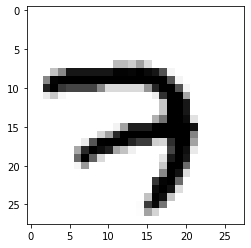

In [82]:
img1 = mnist.train.images[0].reshape(28,28)
plt.imshow(img1, cmap='Greys')

### Defining the number of neurons in each layer

We'll build a *four-layer neural network with three hidden layers and one output layer*. As the size of the input image is 784, we set num_input to 784, and since we have 10 handwritten digits (0 to 9), we set 10 neurons in the output layer.

We define the number of neurons in each layer as follows:

In [94]:
#number of neurons in input layer
num_input = 784 # 28x28 is the size of image

#num of neurons in hidden layer 1
num_hidden1 = 512 # 2**9

#num of neurons in hidden layer 2
num_hidden2 = 256 # 2**8

#num of neurons in hidden layer 3
num_hidden3 = 128 # 2**7

#num of neurons in output layer
num_output = 10 # number of output classification, i.e. 0 to 9.

### Defining placeholders

As we have learned, we first need to define the placeholders for input and output. Values for the placeholders will be fed in at runtime through feed_dict:

In [95]:
with tf.name_scope('input'):
    X = tf.placeholder('float', [None,num_input])
    
with tf.name_scope('output'):
    Y = tf.placeholder('float', [None,num_output])

Since we have a four-layer network, we have four weights and four biases. We initialize our weights by drawing values from the truncated normal distribution with a standard deviation of 0.1. Remember, the dimensions of the weight matrix should be the number of neurons in the previous layer x the number of neurons in the current layer.

For instance, the dimensions of weight matrix w3 should be the number of neurons in hidden layer 2 x the number of neurons in hidden layer 3.

We often define all of the weights in a dictionary, as follows:

In [98]:
with tf.name_scope('weights'):
    weights = {
        'w1':tf.Variable(tf.truncated_normal([num_input,num_hidden1],stddev=0.1),name='weight_1'),
        'w2':tf.Variable(tf.truncated_normal([num_hidden1,num_hidden2],stddev=0.1),name='weight_2'),
        'w3':tf.Variable(tf.truncated_normal([num_hidden2, num_hidden3],stddev=0.1),name='weight_3'),
        'out':tf.Variable(tf.truncated_normal([num_hidden3, num_output],stddev=0.1),name='weight_4'),
    }

The shape of the bias should be the number of neurons in the current layer. For instance, the dimension of the b2 bias is the number of neurons in hidden layer 2.

We set the bias value as a constant; 0.1 in all of the layers:

In [97]:
with tf.name_scope('biases'):
    biases = {
        'b1':tf.Variable(tf.constant(0.1,shape=[num_hidden1]),name='bias_1'),
        'b2':tf.Variable(tf.constant(0.1,shape=[num_hidden2]),name='bias_2'),
        'b3':tf.Variable(tf.constant(0.1,shape=[num_hidden3]),name='bias_3'),
        'out':tf.Variable(tf.constant(0.1,shape=[num_output]),name='bias_4')
    }

### Forward propagation

Now we'll define the forward propagation operation. We'll use ReLU activations in all layers. In the last layers, we'll apply sigmoid activation, as shown in the following code:

In [99]:
with tf.name_scope('Model'):
    
    with tf.name_scope('layer1'):
        layer_1 = tf.nn.relu(tf.add(tf.matmul(X,weights['w1']),biases['b1']))
        
    with tf.name_scope('layer2'):
        layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1,weights['w2']),biases['b2']))
        
    with tf.name_scope('layer3'):
        layer_3 = tf.nn.relu(tf.add(tf.matmul(layer_2,weights['w3']),biases['b3']))
        
    with tf.name_scope('output_layer'):
        y_hat = tf.nn.sigmoid(tf.matmul(layer_3,weights['out']) + biases['out'])

### Computing loss and backpropagation

Next, we'll define our loss function. We'll use softmax cross-entropy as our loss function. TensorFlow provides the tf.nn.softmax_cross_entropy_with_logits() function for computing softmax cross-entropy loss. It takes two parameters as inputs, logits and labels:

- The logits parameter specifies the logits predicted by our network; for example, y_hat.
- The labels parameter specifies the actual labels; for example, true labels, Y.

We take the mean of the loss function using tf.reduce_mean():

In [100]:
with tf.name_scope('Loss'):
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_hat,labels=Y))

Now, we need to minimize the loss using backpropagation. Don't worry! We don't have to calculate the derivatives of all the weights manually. Instead, we can use TensorFlow's optimizer:

In [101]:
learning_rate = 1e-4
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

### Computing accuracy

We calculate the accuracy of our model as follows:

- The y_hat parameter denotes the predicted probability for each class of our model. Since we have 10 classes, we will have 10 probabilities. If the probability is high at position 7, then it means that our network predicts the input image as digit 7 with high probability. The tf.argmax() function returns the index of the largest value. Thus, tf.argmax(y_hat,1) gives the index where the probability is high. Thus, if the probability is high at index 7, then it returns 7.
- The Y parameter denotes the actual labels, and they are the one-hot encoded values. That is, the Y parameter consists of zeros everywhere except at the position of the actual image, where it has a value of 1. For instance, if the input image is 7, then Y has a value of 0 at all indices except at index 7, where it has a value of 1. Thus, tf.argmax(Y,1) returns 7 because that is where we have a high value, 1.

Thus, tf.argmax(y_hat,1) gives the predicted digit, and tf.argmax(Y,1) gives us the actual digit.

The tf.equal(x, y) function takes x and y as inputs and returns the truth value of (x == y) element-wise. Thus, correct_pred = tf.equal(predicted_digit,actual_ digit) consists of True where the actual and predicted digits are the same, and False where the actual and predicted digits are not the same. We convert the Boolean values in correct_pred into float values using TensorFlow's cast operation,
tf.cast(correct_pred, tf.float32). After converting them into float values, we take the average using tf.reduce_mean().

Thus, tf.reduce_mean(tf.cast(correct_pred, tf.float32)) gives us the average correct predictions:

In [102]:
with tf.name_scope('Accuracy'):
    predicted_digit = tf.argmax(y_hat,1)
    actual_digit = tf.argmax(Y,1)
    
    correct_pred = tf.equal(predicted_digit,actual_digit)
    accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32))

### Creating a summary

We can also visualize how the loss and accuracy of our model changes during several iterations in TensorBoard. So, we use tf.summary() to get the summary of the variable. Since the loss and accuracy are scalar variables, we use tf.summary. scalar(), as shown in the following code:

In [103]:
tf.summary.scalar('Accuracy',accuracy)
tf.summary.scalar('Loss',loss)

<tf.Tensor 'Loss_1:0' shape=() dtype=string>

Next, we merge all of the summaries we use in our graph, using tf.summary. merge_all(). We do this because when we have many summaries, running and storing them would become inefficient, so we run them once in our session instead of running them multiple times:

In [104]:
merge_summary = tf.summary.merge_all()

### Training the model

Now, it is time to train our model. As we have learned, first, we need to initialize all of the variables:

In [105]:
init = tf.global_variables_initializer()

Define the batch size, number of iterations, and learning rate, as follows:

In [106]:
learning_rate = 1e-4
num_iterations = 1000
batch_size = 128

Start the TensorFlow session:

In [107]:
with tf.Session() as session:
    session.run(init) #Initialize all variables
    summary_writer = tf.summary.FileWriter('./graphs',graph=tf.get_default_graph()) #Save the event file
    
    #Train the model for a number of iterations
    for i in range(num_iterations):
        batch_x,batch_y = mnist.train.next_batch(batch_size)   #Get a batch of data
        session.run(optimizer,feed_dict={X:batch_x,Y:batch_y}) #Train the network
        
        #Print loss and accuracy for every 100th iteration
        if i%100 == 0:
            batch_loss,batch_accuracy,summary = session.run([loss,accuracy,merge_summary],
                                                feed_dict={X:batch_x,Y:batch_y})
            summary_writer.add_summary(summary,i) #Store all the summaries
            print('Iteration: {}, Loss: {}, Accuracy: {}'.format(i,batch_loss,batch_accuracy))

Iteration: 0, Loss: 2.3035740852355957, Accuracy: 0.1328125
Iteration: 100, Loss: 1.7778828144073486, Accuracy: 0.796875
Iteration: 200, Loss: 1.6371382474899292, Accuracy: 0.8671875
Iteration: 300, Loss: 1.5886646509170532, Accuracy: 0.90625
Iteration: 400, Loss: 1.5720536708831787, Accuracy: 0.8828125
Iteration: 500, Loss: 1.5613884925842285, Accuracy: 0.9140625
Iteration: 600, Loss: 1.5405488014221191, Accuracy: 0.921875
Iteration: 700, Loss: 1.5476689338684082, Accuracy: 0.8984375
Iteration: 800, Loss: 1.5436482429504395, Accuracy: 0.9296875
Iteration: 900, Loss: 1.5180504322052002, Accuracy: 0.96875


This is a good start to learn TensorFlow !

### Visualizing graphs in TensorBoard

After training, we can visualize our computational graph in TensorBoard. As you can see, our Model takes input, weights, and biases as input and returns the output. We compute Loss and Accuracy based on the output of the model. We minimize the loss by calculating gradients and updating weights.

In [108]:
tf.reset_default_graph()

## Introducing eager execution

Eager execution in TensorFlow is more Pythonic and allows rapid prototyping. Unlike graph mode, where we need to construct a graph every time we want to perform any operation, eager execution follows the imperative programming paradigm, where any operation can be performed immediately, without having to create a graph, just like we do in Python. Hence, with eager execution, we can say goodbye to sessions and placeholders. It also makes the debugging process easier with an immediate runtime error, unlike graph mode. For instance, in graph mode, to compute anything, we run the session. As shown in the following code, to evaluate the value of z, we have to run the TensorFlow session:

In [110]:
x = tf.constant(11)
y = tf.constant(11)
z = x*y

with tf.Session() as session:
    print(session.run(z))

121


With eager execution, we don't need to create a session; we can simply compute z, just like we do in Python. In order to enable eager execution, just call the tf.enable_eager_execution() function:

In [3]:
tf.enable_eager_execution()

In [4]:
x = tf.constant(11)
y = tf.constant(11)
z = x*y

print(z)

tf.Tensor(121, shape=(), dtype=int32)


In [5]:
z.numpy()

121

Although eager execution enables the imperative programming paradigm, in this book, we will investigate most of the examples in non-eager mode to better understand the algorithms from scratch. In the next section, we will see how to perform math operations using TensorFlow.

## Math operations in TensorFlow

Now, we will explore some of the operations in TensorFlow using eager execution
mode:

In [6]:
x = tf.constant([1., 2., 3.])
y = tf.constant([3., 2., 1.])

sum = tf.add(x,y)
sum.numpy()

array([4., 4., 4.], dtype=float32)

The tf.subtract function is used for finding the difference between two numbers:

In [7]:
difference = tf.subtract(x,y)
difference.numpy()

array([-2.,  0.,  2.], dtype=float32)

The tf.multiply function is used for multiplying two numbers:

In [8]:
product = tf.multiply(x,y)
product.numpy()

array([3., 4., 3.], dtype=float32)

Divide two numbers using tf.divide:

In [10]:
division = tf.divide(x,y)
division.numpy()

array([0.33333334, 1.        , 3.        ], dtype=float32)

The dot product can be computed as follows:

In [11]:
dot_product = tf.reduce_sum(tf.multiply(x,y))
dot_product.numpy()

10.0

Next, let's find the index of the minimum and maximum elements:

In [12]:
x = tf.constant([10, 0, 13, 9])

The index of the minimum value is computed using tf.argmin():

In [13]:
tf.argmin(x).numpy()

1

The index of the maximum value is computed using tf.argmax():

In [14]:
tf.argmax(x).numpy()

2

Run the following code to find the squared difference between x and y:

In [15]:
x = tf.Variable([1,3,5,7,11])
y = tf.Variable([1])

tf.math.squared_difference(x,y).numpy()

array([  0,   4,  16,  36, 100])

Let's try typecasting; that is, converting from one data type into another.
Print the type of x:

In [16]:
print(x.dtype)

<dtype: 'int32'>


We can convert the type of x, which is tf.int32, into tf.float32, using tf.cast, as shown in the following code:

In [17]:
x = tf.cast(x,dtype=tf.float32)

Instructions for updating:
Colocations handled automatically by placer.


In [18]:
print(x.dtype)

<dtype: 'float32'>


Concatenate the two matrices:

In [19]:
x = [[3,6,9], [7,7,7]]
y = [[4,5,6], [5,5,5]]

Concatenate the matrices row-wise:

In [20]:
tf.concat([x,y],0).numpy()

array([[3, 6, 9],
       [7, 7, 7],
       [4, 5, 6],
       [5, 5, 5]])

Use the following code to concatenate the matrices column-wise:

In [21]:
tf.concat([x,y],1).numpy()

array([[3, 6, 9, 4, 5, 6],
       [7, 7, 7, 5, 5, 5]])

Stack the x matrix using the stack function:

In [22]:
tf.stack(x,axis=1).numpy()

array([[3, 7],
       [6, 7],
       [9, 7]])

Now, let's see how to perform the reduce_mean operation:

In [23]:
x = tf.Variable([[1.0, 5.0], [2.0, 3.0]])
x.numpy()

array([[1., 5.],
       [2., 3.]], dtype=float32)

Compute the mean value of x:

In [24]:
tf.reduce_mean(input_tensor=x).numpy()

2.75

Compute the mean across the row:

In [25]:
tf.reduce_mean(input_tensor=x, axis=0).numpy()

array([1.5, 4. ], dtype=float32)

Compute the mean across the column:

In [26]:
tf.reduce_mean(input_tensor=x, axis=1, keepdims=True).numpy()

array([[3. ],
       [2.5]], dtype=float32)

Draw random values from the probability distributions:

In [27]:
tf.random.normal(shape=(3,2), mean=10.0, stddev=2.0).numpy()

array([[11.954783, 10.704876],
       [ 9.680774,  9.419266],
       [11.953434,  9.355375]], dtype=float32)

In [29]:
tf.random.uniform(shape=(3,2), minval=0, maxval=None, dtype=tf.float32).numpy()

array([[0.4539317 , 0.9621415 ],
       [0.37103105, 0.16316056],
       [0.2978406 , 0.06694841]], dtype=float32)

Compute the softmax probabilities:

In [30]:
x = tf.constant([7., 2., 5.])
tf.nn.softmax(x).numpy()

array([0.8756006 , 0.00589975, 0.11849965], dtype=float32)

Now, we'll look at how to compute the gradients.
Define the square function:

In [31]:
def square(x):
    return tf.multiply(x,x)

The gradients can be computed for the preceding square function using tf.GradientTape, as follows:

In [34]:
with tf.GradientTape(persistent=True) as tape:
    print(square(6).numpy())

36


## TensorFlow 2.0 and Keras

TensorFlow 2.0 has got some really cool features. It sets the eager execution mode by default. It provides a simplified workflow and *uses Keras as the main API for building deep learning models*. It is also backward compatible with TensorFlow 1.x versions.

To install TensorFlow 2.0, open your Terminal and type the following command:

In [35]:
!pip install tensorflow==2.0.0-alpha0

  Found existing installation: tensorflow 1.13.1
    Uninstalling tensorflow-1.13.1:
      Successfully uninstalled tensorflow-1.13.1


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\wisnu\\anaconda3\\lib\\site-packages\\~ensorflow\\python\\_pywrap_tensorflow_internal.pyd'
Consider using the `--user` option or check the permissions.



In [1]:
!pip install tensorflow==2.0.0-alpha0

Since TensorFlow 2.0 uses Keras as a high-level API, we will look at how Keras works in the next section.

### Bonjour Keras

__Keras__ is another popularly used deep learning library. It was developed by François Chollet at Google. It is well known for its fast prototyping, and it makes model building simple. It is a *high-level library, meaning that it does not perform any low-level operations on its own, such as convolution*. It uses a backend engine for doing that, such as TensorFlow. *The Keras API is available in tf.keras, and TensorFlow 2.0 uses it as the primary API*.

Building a model in Keras involves four important steps:
1. Defining the model
2. Compiling the model
3. Fitting the model
4. Evaluating the model

#### Defining the model

The first step is defining the model. Keras provides two different APIs to define the
model:
• The sequential API
• The functional API

#### Defining a sequential model

In a sequential model, we stack each layer, one above another:

    from keras.models import Sequential
    from keras.layers import Dense
    
First, let's define our model as a Sequential() model, as follows:
 
     model = Sequential()
     
Now, define the first layer, as shown in the following code:

    model.add(Dense(13, input_dim=7, activation='relu'))
    
In the preceding code, Dense implies a fully connected layer, input_dim implies the dimension of our input, and activation specifies the activation function that we use. We can stack up as many layers as we want, one above another.

Define the next layer with the relu activation function, as follows:
    
    model.add(Dense(7, activation='relu'))
    
Define the output layer with the sigmoid activation function:
    
    model.add(Dense(1, activation='sigmoid'))
    
The final code block of the sequential model is shown as follows. As you can see, the Keras code is much simpler than the TensorFlow code:

    model = Sequential()
    model.add(Dense(13, input_dim=7, activation='relu'))
    model.add(Dense(7, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

### Defining a functional model

A functional model provides more flexibility than a sequential model. For instance, in a functional model, we can easily connect any layer to another layer, whereas, in a sequential model, each layer is in a stack, one above another. A functional model comes in handy when creating complex models, such as directed acyclic graphs, models with multiple input values, multiple output values, and shared layers. Now, we will see how to define a functional model in Keras.

The first step is to define the input dimensions:
    
    input = Input(shape=(2,))
    
Now, we'll define our *first fully connected layer with 10 neurons* and relu activation, using the Dense class, as shown:

    layer1 = Dense(10, activation='relu')
    
We defined layer1, but where is the input to layer1 coming from? We need to specify the input to layer1 in a bracket notation at the end, as shown:

    layer1 = Dense(10, activation='relu')(input)
    
We define the next layer, layer2, with 13 neurons and relu activation. The input to layer2 comes from layer1, so that is added in the bracket at the end, as shown in the following code:

    layer2 = Dense(10, activation='relu')(layer1)
    
Now, we can define the output layer with the sigmoid activation function. Input to the output layer comes from layer2, so that is added in bracket at the end:

    output = Dense(1, activation='sigmoid')(layer2)
    
After defining all of the layers, we define the model using a Model class, where we need to specify inputs and outputs, as follows:

    model = Model(inputs=input, outputs=output)
    
The complete code for the functional model is shown here:

    input = Input(shape=(2,))
    layer1 = Dense(10, activation='relu')(input)
    layer2 = Dense(10, activation='relu')(layer1)
    output = Dense(1, activation='sigmoid')(layer2)
    model = Model(inputs=input, outputs=output)

### Compiling the model

Now that we have defined the model, the next step is to compile it. In this phase, *we set up how the model should learn*. We define three parameters when compiling the model:

- The __optimizer__ parameter: This defines the optimization algorithm we want to use; for example, the gradient descent.
- The __loss__ parameter: This is the objective function that we are trying to minimize; for example, the mean squared error or cross-entropy loss.
- The __metrics__ parameter: This is the metric through which we want to assess the model's performance; for example, accuracy. We can also specify more than one metric.

Run the following code to compile the model:

    model.compile(loss='binary_crossentropy', optimizer='sgd',metrics=['accuracy'])

### Training the model

We defined and also compiled the model. Now, we will train the model. Training the model can be done using the fit function. We specify our features, x; labels, y; the number of epochs we want to train the model for; and batch_size, as follows:

    model.fit(x=data, y=labels, epochs=100, batch_size=10)

### Evaluating the model

After training the model, we will evaluate the model on the test set:
    
    model.evaluate(x=data_test,y=labels_test)
    
We can also evaluate the model on the same train set, and that will help us to understand the training accuracy:
    
    model.evaluate(x=data,y=labels)
    
That's it. Let's see how to use TensorFlow for the MNIST digit classification task in the next section.

## MNIST digit classification using TensorFlow 2.0

Now, we will see how we can perform MNIST handwritten digit classification, using TensorFlow 2.0. It requires only a few lines of code compared to TensorFlow 1.x. As we have learned, *TensorFlow 2.0 uses Keras as its high-level API*; we just need to add tf.keras to the Keras code.

Let's start by loading the dataset:

In [33]:
import tensorflow as tf

In [34]:
mnist = tf.keras.datasets.mnist

Create a training set and a test set with the following code:

In [35]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

*Normalize the train and test sets by dividing the values of x by the maximum value of x*; that is, 255.0:

In [36]:
x_train, x_test = tf.cast(x_train/255.0, tf.float32), tf.cast(x_test/255.0, tf.float32)
y_train, y_test = tf.cast(y_train, tf.int64), tf.cast(y_test,tf.int64)

Define the sequential model as follows:

In [37]:
model = tf.keras.models.Sequential()

Now, let's add layers to the model. We use a fully-connected three-layer network (instead of CNN) with the ReLU function in the hidden layer and softmax in the final layer. In order to use such network, the input need to be flattened:

In [39]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

Compile the model by running the following line of code:

In [40]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Train the model:

In [41]:
model.fit(x_train,y_train,batch_size=32,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.2914 - accuracy: 0.1355
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.9949 - accuracy: 0.2645
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1767 - accuracy: 0.5072
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8651 - accuracy: 0.6646
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6228 - accuracy: 0.8063
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4698 - accuracy: 0.8773
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3315 - accuracy: 0.9237
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2401 - accuracy: 0.9442
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1898 - accuracy: 0.9555
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.158

Evaluate the model:

In [42]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2544 - accuracy: 0.9465


[0.25435182452201843, 0.9465000033378601]

That's it! Writing code with the Keras API is that simple.

## Summary

We started off this chapter by understanding TensorFlow and how it uses computational graphs. We learned that computation in TensorFlow is represented by a computational graph, which consists of several nodes and edges, where nodes are mathematical operations, such as addition and multiplication, and edges are tensors.

Next, we learned that variables are containers used to store values, and they are used as input to several other operations in a computational graph. We also learned that placeholders are like variables, where we only define the type and dimension but do not assign the values, and the values for the placeholders are fed at runtime. Moving forward, we learned about TensorBoard, which is TensorFlow's visualization tool and can be used to visualize a computational graph. We also explored eager execution, which is more Pythonic and allows rapid prototyping.

We understood that, unlike graph mode, where we need to construct a graph every time to perform any operation, eager execution follows the imperative programming paradigm, where any operation can be performed immediately, without having to create a graph, just like we do in Python.

## Further Reading
You can learn more about TensorFlow by checking its official documentation at
https://www.tensorflow.org/tutorials.

# Introduction to Convolutional Neural Networks

This tutorial demonstrates training a simple Convolutional Neural Network (CNN) to classify CIFAR images. Because this tutorial uses the Keras Sequential API, creating and training our model will take just a few lines of code.

### Import TensorFlow

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets,layers, models
import matplotlib.pyplot as plt

### Download and prepare the CIFAR10 dataset

The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

#Normalize pixel value to between 0 and 1
train_images, test_images = train_images/255.0, test_images/255.0

In [3]:
type(train_images)

numpy.ndarray

In [4]:
len(train_images)

50000

In [5]:
train_images[0].shape

(32, 32, 3)

In [6]:
train_labels[3]

array([4], dtype=uint8)

In [7]:
type(train_labels[3])

numpy.ndarray

In [8]:
train_labels[3][0]

4

In [9]:
type(train_labels[3][0])

numpy.uint8

### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image.

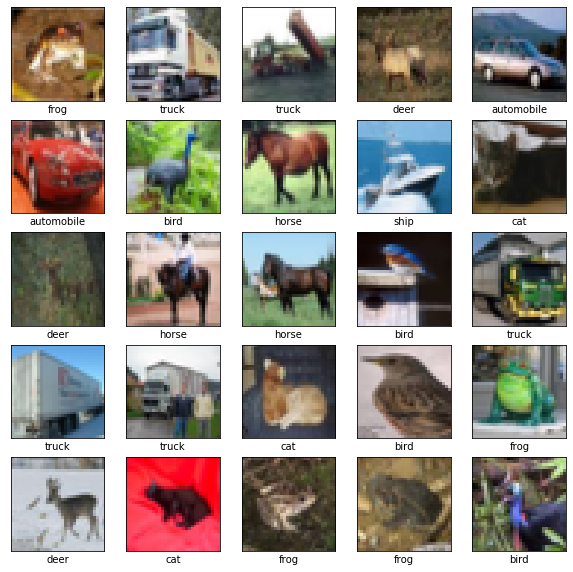

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Theory of CNN

Before CNN, hand-crafted filter is used to detect features of an image wich are then fed to a classifier. In CNN, everything is automated. The networks learn what kind of features that it needed to detect before feed them into the classifier.

In CNN, neuron only connect to a certain patch (area) of input image. A weighted filter perform convolution on those patch of image to detect features. Weight of filter itself is updated by mean of optimization. Thus, CNN provides automatic (learnable) feature detection which is then conncected to full-connected layer for classification. The fully-connected layer is often use softmax.

Note that we need to detect a variety of features given an image. Thus, we need to specify multiple filter to detect multiple features. The convolution between an image and filter result in feature map that shows which area of the image contain feature as detected by the filter. Thus if we specify n filters, then we will have n feature maps. The output of each neuron is then obtained by nonlinear activation function (typically relu.)

A process of downsampling called "pooling" is then perform in feature maps to reduce the image dimension. Typically we use max pooling where the maximum of a patch of pixel values is taken as the new value.

After several process of convolution + activation and pooling, the last feature maps is flatten, and then connected to a fully-connected networks. The fully-connected networks act as a mapping between image and the label of that image. Since fully-connected networks yield real numbers, it is typical to connect it with a softmax layer with [0,1] outout. Such output can be interpreted as the probability of the labels given input image.

### Create the convolutional base

The 6 lines of code below define the convolutional base using a common pattern: a stack of Conv2D and MaxPooling2D layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure our CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument input_shape to our first layer.

To create 2D convolution layer:

    tf.keras.layers.Conv2D(
    filters, kernel_size, strides=(1, 1), padding='valid',
    data_format=None, dilation_rate=(1, 1), groups=1, activation=None,
    use_bias=True, kernel_initializer='glorot_uniform',
    bias_initializer='zeros', kernel_regularizer=None,
    bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,
    bias_constraint=None, **kwargs)
    
where

- filters:	Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).
- kernel_size:	An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window. Can be a single integer to specify the same value for all spatial dimensions.
- strides: An integer or tuple/list of 2 integers, specifying the strides of the convolution along the height and width. Can be a single integer to specify the same value for all spatial dimensions. Specifying any stride value != 1 is incompatible with specifying any dilation_rate value != 1.
- padding: one of "valid" or "same" (case-insensitive). "valid" means no padding. "same" results in padding evenly to the left/right or up/down of the input such that output has the same height/width dimension as the input.

This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs. If use_bias is True, a bias vector is created and added to the outputs. Finally, if activation is not None, it is applied to the outputs as well.

When using this layer as the first layer in a model, provide the keyword argument input_shape (tuple of integers, does not include the sample axis), e.g. input_shape=(128, 128, 3) for 128x128 RGB pictures in data_format="channels_last".

To create pooling:
    
    tf.keras.layers.MaxPool2D(
    pool_size=(2, 2), strides=None, padding='valid', data_format=None,
    **kwargs)
    
where

- pool_size	integer or tuple of 2 integers, window size over which to take the maximum. (2, 2) will take the max value over a 2x2 pooling window. If only one integer is specified, the same window length will be used for both dimensions.
- strides	Integer, tuple of 2 integers, or None. Strides values. Specifies how far the pooling window moves for each pooling step. If None, it will default to pool_size.
- padding	One of "valid" or "same" (case-insensitive). "valid" means no padding. "same" results in padding evenly to the left/right or up/down of the input such that output has the same height/width dimension as the input.

Downsamples the input representation by taking the maximum value over the window defined by pool_size for each dimension along the features axis. The window is shifted by strides in each dimension. The resulting output when using "valid" padding option has a shape(number of rows or columns) of: output_shape = (input_shape - pool_size + 1) / strides)

The resulting output shape when using the "same" padding option is: output_shape = input_shape / strides

In [10]:
model = models.Sequential()

# First convolutional layer.
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(2,2))

# Second convolutional layer.
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

# Third convolutional layer.
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

# Fully connected classifier.
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically, as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

To complete our model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D, then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

Let's display the architecture of our model so far.

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)              

As you can see, our (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

### Compile and train the model

In [12]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 36s 22ms/step - loss: 1.7886 - accuracy: 0.3346 - val_loss: 1.2457 - val_accuracy: 0.5564
Epoch 2/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.1857 - accuracy: 0.5821 - val_loss: 1.0606 - val_accuracy: 0.6315
Epoch 3/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.0012 - accuracy: 0.6505 - val_loss: 0.9600 - val_accuracy: 0.6691
Epoch 4/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.8856 - accuracy: 0.6927 - val_loss: 0.9037 - val_accuracy: 0.6880
Epoch 5/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.8161 - accuracy: 0.7121 - val_loss: 0.8898 - val_accuracy: 0.6953
Epoch 6/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7485 - accuracy: 0.7396 - val_loss: 0.8752 - val_accuracy: 0.7007
Epoch 7/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.6934 - accuracy: 0.7546 - val_loss: 0.9193 -

### Evaluate the model

313/313 - 4s - loss: 0.8924 - accuracy: 0.7080


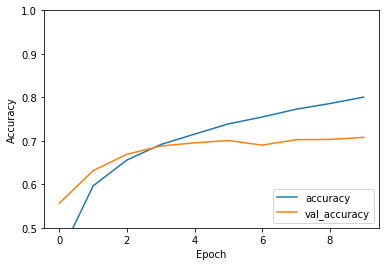

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [14]:
print(test_acc)

0.7080000042915344


Our simple CNN has achieved a test accuracy of almost 70%. Not bad for a few lines of code!

# TensorFlow 2 quickstart for experts

Import TensorFlow into your program:

In [18]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

Load and prepare the MNIST dataset.

In [19]:
mnist = tf.keras.datasets.mnist

(x_train,y_train), (x_test,y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255/0

#Add a channel dimension
x_train = x_train[...,tf.newaxis].astype("float32")
x_test = x_test[...,tf.newaxis].astype("float32")

C:\Users\Wisnu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\Wisnu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [20]:
type(x_train)

numpy.ndarray

In [21]:
x_train.shape

(60000, 28, 28, 1)

In [22]:
x_train[0].shape

(28, 28, 1)

In [27]:
y_train.shape

(60000,)

Use tf.data to batch and shuffle the dataset:

In [28]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train,y_train)).shuffle(10000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((x_test,y_test)).batch(32)

Build the tf.keras model using the Keras model subclassing API:

In [29]:
class MyModel(Model):
    def __init__(self):
        super(MyModel,self).__init__()
        self.conv1 = Conv2D(32,3, activation='relu')
        self.flatten = Flatten()
        self.d1 = Dense(128, activation='relu')
        self.d2 = Dense(10)
        
    def call(self,x):
        x = self.conv1(x)
        x = self.flatten(x)
        x = self.d1(x)
        return self.d2(x)
    
# Create an instance of the model
model = MyModel()

Choose an optimizer and loss function for training:

In [30]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()

Select metrics to measure the loss and the accuracy of the model. These metrics accumulate the values over epochs and then print the overall result.

In [31]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

Use tf.GradientTape to train the model:

In [32]:
@tf.function
def train_step(images,labels):
    with tf.GradientTape() as tape:
        # training=True is only needed if there are layers with different
        # behavior during training versus inference (e.g. Dropout).
        predictions = model(images, training=True)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    train_loss(loss)
    train_accuracy(labels,predictions)

Test the model:

In [33]:
@tf.function
def test_step(images,labels):
    # training=False is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    predictions = model(images,training=False)
    t_loss = loss_object(labels,predictions)
    
    test_loss(t_loss)
    test_accuracy(labels, predictions)

In [34]:
EPOCHS = 5

for epoch in range(EPOCHS):
    # Reset the metrics at the start of the next epoch
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()
    
    for images,labels in train_ds:
        train_step(images,labels)
        
    for test_images, test_labels in test_ds:
        test_step(test_images, test_labels)
        
    print(
    f'Epoch {epoch + 1}, '
    f'Loss: {train_loss.result()}, '
    f'Accuracy: {train_accuracy.result() * 100}, '
    f'Test Loss: {test_loss.result()}, '
    f'Test Accuracy: {test_accuracy.result() * 100}'
  )

Epoch 1, Loss: 0.13908882439136505, Accuracy: 95.78333282470703, Test Loss: nan, Test Accuracy: 9.800000190734863
Epoch 2, Loss: 0.044882457703351974, Accuracy: 98.57666778564453, Test Loss: nan, Test Accuracy: 9.800000190734863
Epoch 3, Loss: 0.023053841665387154, Accuracy: 99.2733383178711, Test Loss: nan, Test Accuracy: 9.800000190734863
Epoch 4, Loss: 0.016719574108719826, Accuracy: 99.47166442871094, Test Loss: nan, Test Accuracy: 9.800000190734863
Epoch 5, Loss: 0.010422133840620518, Accuracy: 99.6383285522461, Test Loss: nan, Test Accuracy: 9.800000190734863


# Basic classification: Classify images of clothing

This guide trains a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details; this is a fast-paced overview of a complete TensorFlow program with the details explained as you go.

This guide uses *tf.keras, a high-level API* to build and train models in TensorFlow.

In [36]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


## Import the Fashion MNIST dataset

This guide uses the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories.

Fashion MNIST is intended as a drop-in replacement for the classic MNIST dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow:

In [37]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Loading the dataset returns four NumPy arrays:

- The train_images and train_labels arrays are the training set—the data the model uses to learn.
- The model is tested against the test set, the test_images, and test_labels arrays.

*The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255*. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

In [39]:
train_images.shape

(60000, 28, 28)

![](label.jpg)

Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:

In [40]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [41]:
type(class_names)

list

In [42]:
class_names[1]

'Trouser'

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [43]:
train_images.shape

(60000, 28, 28)

In [44]:
type(train_images)

numpy.ndarray

Likewise, there are 60,000 labels in the training set:

In [45]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [46]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [47]:
type(train_labels)

numpy.ndarray

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [53]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [54]:
len(test_images)

10000

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

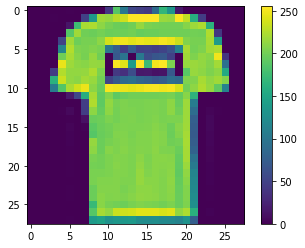

In [56]:
#Plot figure of train_images[0]
plt.figure()
plt.imshow(train_images[1])

plt.colorbar()  #Show color bar
plt.grid(False) #No grid

plt.show() #Show image

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

In [57]:
train_images = train_images/255.0
test_images = test_images/255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

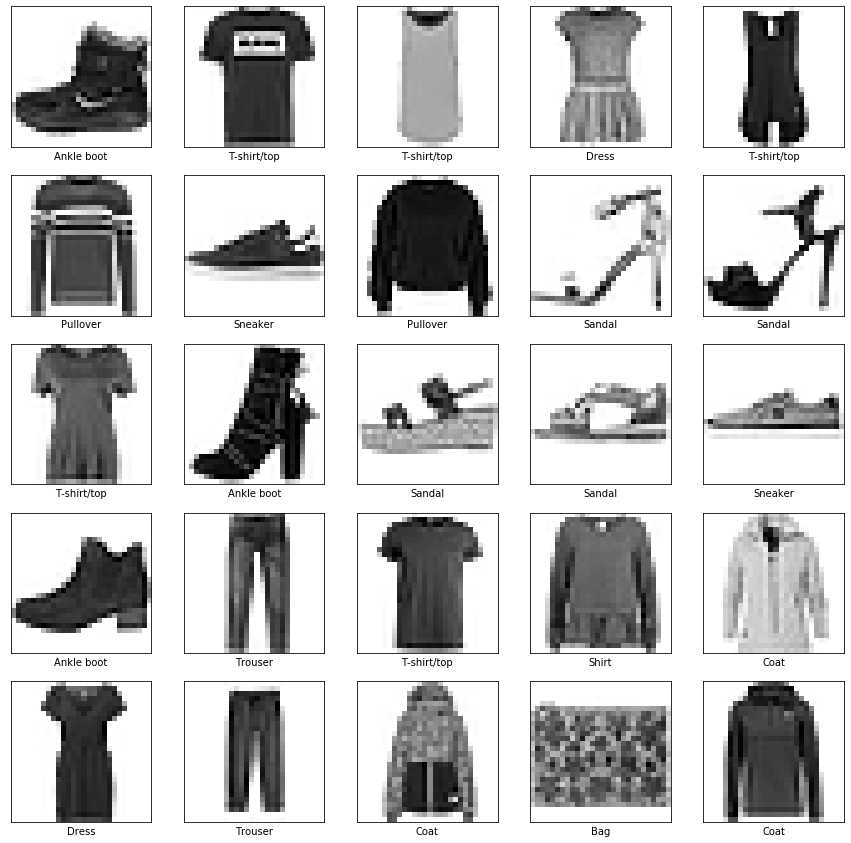

In [62]:
plt.figure(figsize=(15,15))  #Plot figure

#Show only 25 figures
for i in range(25):
    plt.subplot(5,5,i+1) #Display as 5x5 array of pictures
    plt.xticks([]) # No ticks.
    plt.yticks([]) # No ticks.
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

*The basic building block of a neural network is the layer*. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

*Most of deep learning consists of chaining together simple layers*. Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training.

In [64]:
# Input_shape should follow from images size.
# The last layer's parameter should follow from number of labels.

model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10)
        ])

In [73]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). *The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.*

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

- Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
- Optimizer —This is how the model is updated based on the data it sees and its loss function.
- Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [71]:
# Use SparseCategoricalCrossentropy as crossentropy loss function when there  
# are two or more label classes, where labels to be provided as integers.

model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the test_images array.
4. Verify that the predictions match the labels from the test_labels array.

### Feed the model
To start training, call the model.fit method—so called because it "fits" the model to the training data:

In [72]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6370 - accuracy: 0.7791
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3823 - accuracy: 0.8614
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3392 - accuracy: 0.8778
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3146 - accuracy: 0.8849
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2911 - accuracy: 0.8926
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2765 - accuracy: 0.8971
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2644 - accuracy: 0.9011
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2557 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2460 - accuracy: 0.9081
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.236

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

### Evaluate accuracy
Next, compare how the model performs on the test dataset:

In [74]:
# verbose = 2, means one line per epoch.
model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 0.3338 - accuracy: 0.8876


[0.33376041054725647, 0.8876000046730042]

It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting. 

Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. 

### Make predictions
With the model trained, you can use it to make predictions about some images. The model's linear outputs, logits. Attach a softmax layer to convert the logits to probabilities, which are easier to interpret. The logits layer typically produces values from -infinity to +infinity and the softmax layer transforms it to values from 0 to 1 (probability).

In [75]:
# Attach a softmax layer to convert the logits to probabilities
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [76]:
predictions = probability_model.predict(test_images)

In [77]:
predictions.shape

(10000, 10)

In [78]:
len(predictions)

10000

In [79]:
len(predictions[10000-1])

10

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [80]:
predictions[0]

array([1.8818412e-06, 4.8261186e-09, 5.9527076e-07, 1.0127904e-10,
       1.9967377e-08, 3.2312499e-05, 1.3005977e-06, 6.8522701e-03,
       8.3997683e-08, 9.9311161e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [81]:
np.argmax(predictions[0])

9

In [84]:
type(predictions[0])

numpy.ndarray

In [85]:
predictions[0].shape

(10,)

In [86]:
predictions[0][np.argmax(predictions[0])]

0.9931116

In [87]:
type(class_names)

list

In [88]:
class_names[np.argmax(predictions[0])]

'Ankle boot'

So, the model is most confident that this image is an ankle boot, or class_names[9]. Examining the test label shows that this classification is correct:

In [89]:
test_labels[0]

9

In [90]:
np.argmax(predictions[0]) == test_labels[0]

True

Graph this to look at the full set of 10 class predictions.

In [27]:
# Create function to plot images.
# plot_image(i, predictions[i], test_labels, test_images)

def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
    
    
# Create function to plot value array
# plot_value_array(1, prediction_single[0], test_labels)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

### Verify predictions
With the model trained, you can use it to make predictions about some images.

Let's look at the 0th and 12th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

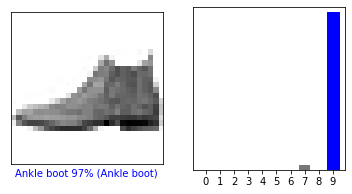

In [29]:
i = 0
plt.figure(figsize=(6,3))

plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)

plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)

plt.show()

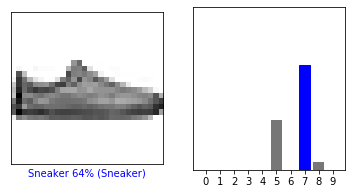

In [30]:
i = 12
plt.figure(figsize=(6,3))

plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)

plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)

plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

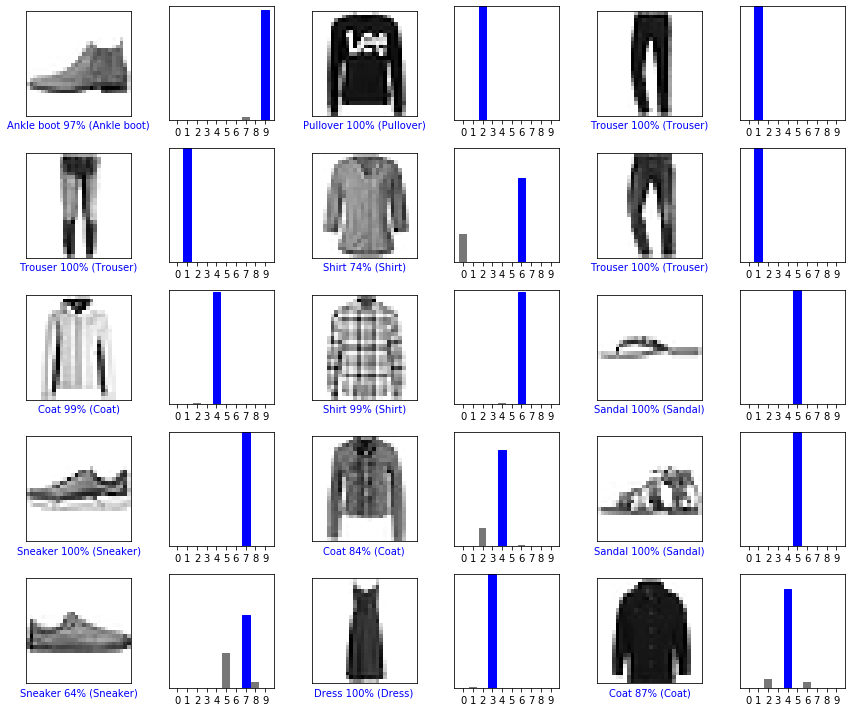

In [31]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color: correct predictions in blue and incorrect predictions in red.

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
    
plt.tight_layout()
plt.show()

### Use the trained model
Finally, use the trained model to make a prediction about a single image.

In [91]:
# Grab an image from the test dataset.
img = test_images[1]
print(img.shape)

(28, 28)


In [92]:
type(test_images[1])

numpy.ndarray

*tf.keras models are optimized to make predictions on a batch, or collection, of examples at once*. Accordingly, even though you're using a single image, you need to add it to a list:

In [40]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [41]:
prediction_single = probability_model.predict(img)
print(prediction_single)

[[5.4675460e-05 1.6857775e-12 9.9849522e-01 3.3483689e-09 9.2005025e-04
  8.7146929e-13 5.3004373e-04 1.1221808e-14 2.3370299e-09 6.3795947e-15]]


In [42]:
np.argmax(prediction_single)

2

In [46]:
type(prediction_single)

numpy.ndarray

In [47]:
prediction_single.shape

(1, 10)

In [52]:
prediction_single[0]

array([5.4675460e-05, 1.6857775e-12, 9.9849522e-01, 3.3483689e-09,
       9.2005025e-04, 8.7146929e-13, 5.3004373e-04, 1.1221808e-14,
       2.3370299e-09, 6.3795947e-15], dtype=float32)

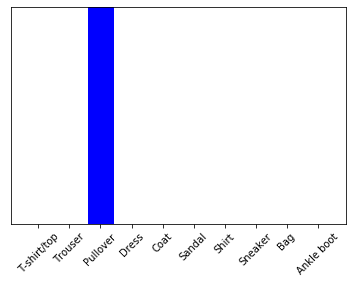

In [38]:
plot_value_array(1, prediction_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

tf.keras.Model.predict returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [39]:
np.argmax(prediction_single[0])

2

And the model predicts a label as expected.

## Overfit and underfit

As always, the code in this example will use the tf.keras API, which you can learn more about in the TensorFlow Keras guide.

In both of the previous examples—classifying text and predicting fuel efficiency — we saw that the accuracy of our model on the validation data would peak after training for a number of epochs, and would then stagnate or start decreasing.

In other words, our model would overfit to the training data. Learning how to deal with overfitting is important. Although it's often possible to achieve high accuracy on the training set, *what we really want is to develop models that generalize well to a testing set* (or data they haven't seen before).

The opposite of overfitting is underfitting. Underfitting occurs when there is still room for improvement on the train data. This can happen for a number of reasons: If the model is not powerful enough, is over-regularized, or has simply not been trained long enough. This means the network has not learned the relevant patterns in the training data.

If you train for too long though, the model will start to overfit and learn patterns from the training data that don't generalize to the test data. We need to strike a balance. Understanding how to train for an appropriate number of epochs as we'll explore below is a useful skill.

To prevent overfitting, the best solution is to use more complete training data. The dataset should cover the full range of inputs that the model is expected to handle. Additional data may only be useful if it covers new and interesting cases.

A model trained on more complete data will naturally generalize better. When that is no longer possible, the next best solution is to use techniques like regularization. These place constraints on the quantity and type of information your model can store. If a network can only afford to memorize a small number of patterns, the optimization process will force it to focus on the most prominent patterns, which have a better chance of generalizing well.

In this notebook, we'll explore several common regularization techniques, and use them to improve on a classification model.

### Setup
Before getting started, import the necessary packages:

In [93]:
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import regularizers

print(tf.__version__)

2.4.1


In [33]:
conda install git

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Wisnu\Anaconda3

  added / updated specs:
    - git


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.9.2                |   py37haa95532_0         2.9 MB
    git-2.23.0                 |       h6bb4b03_0        10.5 MB
    ------------------------------------------------------------
                                           Total:        13.4 MB

The following NEW packages will be INSTALLED:

  git                pkgs/main/win-64::git-2.23.0-h6bb4b03_0

The following packages will be UPDATED:

  conda                                        4.8.4-py37_0 --> 4.9.2-py37haa95532_0




conda-4.9.2          | 2.9 MB    |            |   0% 
conda-4.9.2          | 2.9 MB    |            |   1% 
conda-4.9.2          | 2.9 MB    | 6          |   7% 
conda-4.9.2          | 2.9 MB    | #4         

In [4]:
!pip install -q git+https://github.com/tensorflow/docs 

In [94]:
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

In [95]:
from  IPython import display
from matplotlib import pyplot as plt

import numpy as np

import pathlib
import shutil
import tempfile

In [96]:
logdir = pathlib.Path(tempfile.mkdtemp())/"tensorboard_logs"
shutil.rmtree(logdir, ignore_errors=True)

### The Higgs Dataset
The goal of this tutorial is not to do particle physics, so don't dwell on the details of the dataset. It contains 11 000 000 examples, each with 28 features, and a binary class label.

In [97]:
gz = tf.keras.utils.get_file('HIGGS.csv.gz', 'http://mlphysics.ics.uci.edu/data/higgs/HIGGS.csv.gz')

In [98]:
FEATURES = 28

The tf.data.experimental.CsvDataset class can be used to read csv records directly from a gzip file with no intermediate decompression step.

In [99]:
ds = tf.data.experimental.CsvDataset(gz,[float(),]*(FEATURES+1), compression_type="GZIP")

That csv reader class returns a list of scalars for each record. The following function repacks that list of scalars into a (feature_vector, label) pair.

In [100]:
def pack_row(*row):
    label = row[0]
    features = tf.stack(row[1:],1)
    return features, label

TensorFlow is most efficient when operating on large batches of data.

So instead of repacking each row individually make a new Dataset that takes batches of 10000-examples, applies the pack_row function to each batch, and then splits the batches back up into individual records:

In [101]:
packed_ds = ds.batch(10000).map(pack_row).unbatch()

Have a look at some of the records from this new packed_ds.

The features are not perfectly normalized, but this is sufficient for this tutorial.

tf.Tensor(
[ 0.8692932  -0.6350818   0.22569026  0.32747006 -0.6899932   0.75420225
 -0.24857314 -1.0920639   0.          1.3749921  -0.6536742   0.9303491
  1.1074361   1.1389043  -1.5781983  -1.0469854   0.          0.65792954
 -0.01045457 -0.04576717  3.1019614   1.35376     0.9795631   0.97807616
  0.92000484  0.72165745  0.98875093  0.87667835], shape=(28,), dtype=float32)


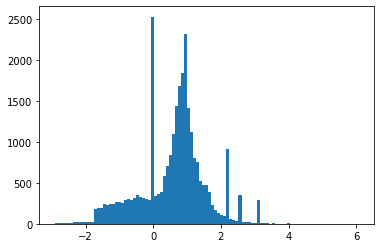

In [102]:
for features,label in packed_ds.batch(1000).take(1):
    print(features[0])
    plt.hist(features.numpy().flatten(), bins = 101)

To keep this tutorial relatively short use just the first 1000 samples for validation, and the next 10 000 for training:

In [103]:
N_VALIDATION = int(1e3)
N_TRAIN = int(1e4)
BUFFER_SIZE = int(1e4)
BATCH_SIZE = 500
STEPS_PER_EPOCH = N_TRAIN//BATCH_SIZE

The Dataset.skip and Dataset.take methods make this easy.

At the same time, use the Dataset.cache method to ensure that the loader doesn't need to re-read the data from the file on each epoch:

In [104]:
validate_ds = packed_ds.take(N_VALIDATION).cache()
train_ds = packed_ds.skip(N_VALIDATION).take(N_TRAIN).cache()

In [105]:
train_ds

<CacheDataset shapes: ((28,), ()), types: (tf.float32, tf.float32)>

These datasets return individual examples. Use the .batch method to create batches of an appropriate size for training. Before batching also remember to .shuffle and .repeat the training set.

In [106]:
validate_ds = validate_ds.batch(BATCH_SIZE)
train_ds = train_ds.shuffle(BUFFER_SIZE).repeat().batch(BATCH_SIZE)

### Demonstrate overfitting
The simplest way to prevent overfitting is to start with a small model: A model with a small number of learnable parameters (which is determined by the number of layers and the number of units per layer). In deep learning, the number of learnable parameters in a model is often referred to as the model's "capacity".

Intuitively, a model with more parameters will have more "memorization capacity" and therefore will be able to easily learn a perfect dictionary-like mapping between training samples and their targets, a mapping without any generalization power, but this would be useless when making predictions on previously unseen data.

Always keep this in mind: deep learning models tend to be good at fitting to the training data, but the real challenge is generalization, not fitting.

On the other hand, if the network has limited memorization resources, it will not be able to learn the mapping as easily. To minimize its loss, it will have to learn compressed representations that have more predictive power. At the same time, if you make your model too small, it will have difficulty fitting to the training data. There is a balance between "too much capacity" and "not enough capacity".

Unfortunately, there is no magical formula to determine the right size or architecture of your model (in terms of the number of layers, or the right size for each layer). You will have to experiment using a series of different architectures.

*To find an appropriate model size, it's best to start with relatively few layers and parameters, then begin increasing the size of the layers or adding new layers until you see diminishing returns on the validation loss.*

Start with a simple model using only layers.Dense as a baseline, then create larger versions, and compare them.

### Training procedure
Many models train better if you gradually reduce the learning rate during training. Use optimizers.schedules to reduce the learning rate over time:

In [107]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
            0.001, decay_steps=STEPS_PER_EPOCH*1000,
            decay_rate=1, staircase=False)

def get_optimizer():
    return tf.keras.optimizers.Adam(lr_schedule)

The code above sets a schedules.InverseTimeDecay to hyperbolically decrease the learning rate to 1/2 of the base rate at 1000 epochs, 1/3 at 2000 epochs and so on.

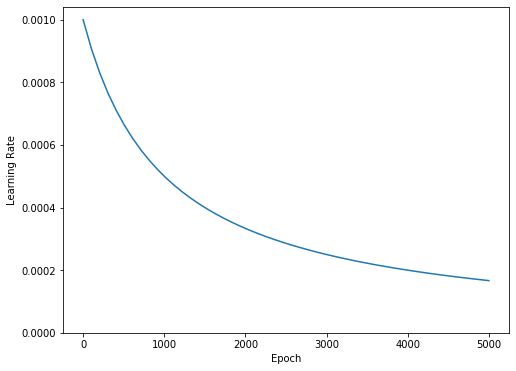

In [108]:
step = np.linspace(0,100000)
lr = lr_schedule(step)

plt.figure(figsize=(8,6))
plt.plot(step/STEPS_PER_EPOCH, lr)
plt.ylim([0,max(plt.ylim())])
plt.xlabel('Epoch')
_ = plt.ylabel('Learning Rate')

Each model in this tutorial will use the same training configuration. So set these up in a reusable way, starting with the list of callbacks.

The training for this tutorial runs for many short epochs. To reduce the logging noise use the tfdocs.EpochDots which simply prints a . for each epoch, and a full set of metrics every 100 epochs.

Next include callbacks.EarlyStopping to avoid long and unnecessary training times. Note that this callback is set to monitor the val_binary_crossentropy, not the val_loss. This difference will be important later.

Use callbacks.TensorBoard to generate TensorBoard logs for the training.

In [109]:
def get_callbacks(name):
    return [
        tfdocs.modeling.EpochDots(),
        tf.keras.callbacks.EarlyStopping(monitor='val_binary_crossentropy', patience=200),
        tf.keras.callbacks.TensorBoard(logdir/name),
  ]

Similarly each model will use the same Model.compile and Model.fit settings:

In [111]:
def compile_and_fit(model, name, optimizer=None, max_epochs=10000):
    if optimizer is None:
        optimizer = get_optimizer()
    model.compile(optimizer=optimizer,
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=[
                  tf.keras.losses.BinaryCrossentropy(
                      from_logits=True, name='binary_crossentropy'),
                  'accuracy'])

    model.summary()

    history = model.fit(
        train_ds,
        steps_per_epoch = STEPS_PER_EPOCH,
        epochs=max_epochs,
        validation_data=validate_ds,
        callbacks=get_callbacks(name),
        verbose=0)
    return history

### Tiny model
Start by training a model:

In [112]:
tiny_model = tf.keras.Sequential([
        layers.Dense(16, activation='elu', input_shape=(FEATURES,)),
        layers.Dense(1)
])

In [113]:
size_histories = {}

In [114]:
size_histories['Tiny'] = compile_and_fit(tiny_model, 'sizes/Tiny')

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                464       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, accuracy:0.4693,  binary_crossentropy:0.7615,  loss:0.7615,  val_accuracy:0.4270,  val_binary_crossentropy:0.7552,  val_loss:0.7552,  
....................................................................................................
Epoch: 100, accuracy:0.5875,  binary_crossentropy:0.6300,  loss:0.6300,  val_accuracy:0.5780,  val_binary_crossentropy:0.6344,  val_loss:0.6344,  
....................................................................................................
Epoch: 200, accuracy:0.

Now check how the model did:

(0.5, 0.7)

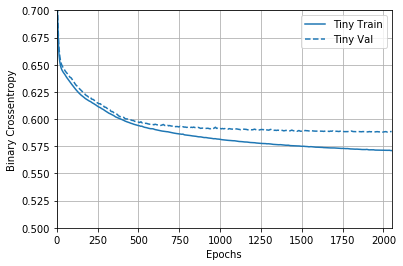

In [115]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'binary_crossentropy', smoothing_std=10)
plotter.plot(size_histories)
plt.ylim([0.5, 0.7])

### Small model
To see if you can beat the performance of the small model, progressively train some larger models.

Try two hidden layers with 16 units each:

In [116]:
small_model = tf.keras.Sequential([
    # `input_shape` is only required here so that `.summary` works.
    layers.Dense(16, activation='elu', input_shape=(FEATURES,)),
    layers.Dense(16, activation='elu'),
    layers.Dense(1)
])

In [117]:
size_histories['Small'] = compile_and_fit(small_model, 'sizes/Small')

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                464       
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 753
Trainable params: 753
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, accuracy:0.4884,  binary_crossentropy:0.7793,  loss:0.7793,  val_accuracy:0.4690,  val_binary_crossentropy:0.7407,  val_loss:0.7407,  
....................................................................................................
Epoch: 100, accuracy:0.6188,  binary_crossentropy:0.6142,  loss:0.6142,  val_accuracy:0.6060,  val_binary_crossentropy:0.6124,  val_loss:0.

### Medium model
Now try 3 hidden layers with 64 units each:

In [120]:
medium_model = tf.keras.Sequential([
    layers.Dense(64, activation='elu', input_shape=(FEATURES,)),
    layers.Dense(64, activation='elu'),
    layers.Dense(64, activation='elu'),
    layers.Dense(1)
])

In [121]:
size_histories['Medium']  = compile_and_fit(medium_model, "sizes/Medium")

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 64)                1856      
_________________________________________________________________
dense_20 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_21 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 65        
Total params: 10,241
Trainable params: 10,241
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, accuracy:0.4855,  binary_crossentropy:0.7031,  loss:0.7031,  val_accuracy:0.4740,  val_binary_crossentropy:0.6796,  val_loss:0.6796,  
....................................................................................................
E

### Large model
As an exercise, you can create an even larger model, and see how quickly it begins overfitting. Next, let's add to this benchmark a network that has much more capacity, far more than the problem would warrant:

In [122]:
large_model = tf.keras.Sequential([
    layers.Dense(512, activation='elu', input_shape=(FEATURES,)),
    layers.Dense(512, activation='elu'),
    layers.Dense(512, activation='elu'),
    layers.Dense(512, activation='elu'),
    layers.Dense(1)
])

In [123]:
size_histories['large'] = compile_and_fit(large_model, "sizes/large")

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 512)               14848     
_________________________________________________________________
dense_24 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_25 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_26 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 513       
Total params: 803,329
Trainable params: 803,329
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, accuracy:0.4984,  binary_crossentropy:0.7757,  loss:0.7757,  val_accuracy:0.5270,  val_binary_crossentr

### Plot the training and validation losses
The solid lines show the training loss, and the dashed lines show the validation loss (remember: a lower validation loss indicates a better model).

While building a larger model gives it more power, if this power is not constrained somehow it can easily overfit to the training set.

In this example, typically, only the "Tiny" model manages to avoid overfitting altogether, and each of the larger models overfit the data more quickly. This becomes so severe for the "large" model that you need to switch the plot to a log-scale to really see what's happening.

This is apparent if you plot and compare the validation metrics to the training metrics.

- It's normal for there to be a small difference.
- If both metrics are moving in the same direction, everything is fine.
- If the validation metric begins to stagnate while the training metric continues to improve, you are probably close to overfitting.
- If the validation metric is going in the wrong direction, the model is clearly overfitting.

Text(0.5, 0, 'Epochs [Log Scale]')

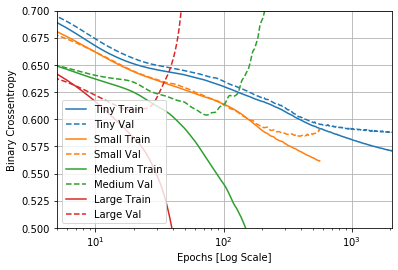

In [124]:
plotter.plot(size_histories)
a = plt.xscale('log')
plt.xlim([5, max(plt.xlim())])
plt.ylim([0.5, 0.7])
plt.xlabel("Epochs [Log Scale]")

### Strategies to prevent overfitting
Before getting into the content of this section copy the training logs from the "Tiny" model above, to use as a baseline for comparison.

In [125]:
shutil.rmtree(logdir/'regularizers/Tiny', ignore_errors=True)
shutil.copytree(logdir/'sizes/Tiny', logdir/'regularizers/Tiny')

WindowsPath('C:/Users/Wisnu/AppData/Local/Temp/tmpgdy_w1jj/tensorboard_logs/regularizers/Tiny')

In [126]:
# PosixPath('/tmp/tmpr1cbfjvl/tensorboard_logs/regularizers/Tiny')

In [127]:
regularizer_histories = {}
regularizer_histories['Tiny'] = size_histories['Tiny']

### Add weight regularization
You may be familiar with *Occam's Razor principle: given two explanations for something, the explanation most likely to be correct is the "simplest" one, the one that makes the least amount of assumptions*. This also applies to the models learned by neural networks: given some training data and a network architecture, there are multiple sets of weights values (multiple models) that could explain the data, and simpler models are less likely to overfit than complex ones.

A "simple model" in this context is a model where the distribution of parameter values has less entropy (or a model with fewer parameters altogether, as we saw in the section above). Thus a common way to mitigate overfitting is to put constraints on the complexity of a network by forcing its weights only to take small values, which makes the distribution of weight values more "regular". This is called "weight regularization", and it is done by adding to the loss function of the network a cost associated with having large weights. This cost comes in two flavors:

- L1 regularization, where the cost added is proportional to the absolute value of the weights coefficients (i.e. to what is called the "L1 norm" of the weights).

- L2 regularization, where the cost added is proportional to the square of the value of the weights coefficients (i.e. to what is called the squared "L2 norm" of the weights). L2 regularization is also called weight decay in the context of neural networks. Don't let the different name confuse you: weight decay is mathematically the exact same as L2 regularization.

L1 regularization pushes weights towards exactly zero encouraging a sparse model. L2 regularization will penalize the weights parameters without making them sparse since the penalty goes to zero for small weights-one reason why L2 is more common.

In tf.keras, weight regularization is added by passing weight regularizer instances to layers as keyword arguments. Let's add L2 weight regularization now.

In [128]:
l2_model = tf.keras.Sequential([
    layers.Dense(512, activation='elu',
                 kernel_regularizer=regularizers.l2(0.001),
                 input_shape=(FEATURES,)),
    layers.Dense(512, activation='elu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(512, activation='elu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(512, activation='elu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1)
])

regularizer_histories['l2'] = compile_and_fit(l2_model, "regularizers/l2")

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 512)               14848     
_________________________________________________________________
dense_29 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_30 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_31 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 513       
Total params: 803,329
Trainable params: 803,329
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, accuracy:0.5073,  binary_crossentropy:0.7947,  loss:2.3021,  val_accuracy:0.4710,  val_binary_crossentr

l2(0.001) means that every coefficient in the weight matrix of the layer will add 0.001 * weight_coefficient_value**2 to the total loss of the network.

That is why we're monitoring the binary_crossentropy directly. Because it doesn't have this regularization component mixed in.

So, that same "Large" model with an L2 regularization penalty performs much better:

(0.5, 0.7)

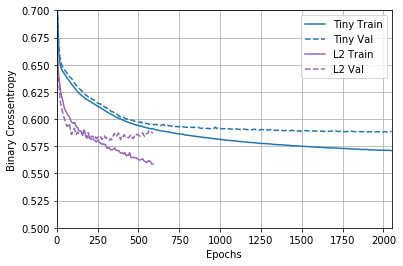

In [129]:
plotter.plot(regularizer_histories)
plt.ylim([0.5, 0.7])

As you can see, the "L2" regularized model is now much more competitive with the the "Tiny" model. This "L2" model is also much more resistant to overfitting than the "Large" model it was based on despite having the same number of parameters.

#### More info
There are two important things to note about this sort of regularization.

__First__: if you are writing your own training loop, then you need to be sure to ask the model for its regularization losses.

In [130]:
result = l2_model(features)
regularization_loss=tf.add_n(l2_model.losses)

__Second__: This implementation works by adding the weight penalties to the model's loss, and then applying a standard optimization procedure after that.

There is a second approach that instead only runs the optimizer on the raw loss, and then while applying the calculated step the optimizer also applies some weight decay. This "Decoupled Weight Decay" is seen in optimizers like optimizers.FTRL and optimizers.AdamW.

### Add dropout
Dropout is one of the most effective and most commonly used regularization techniques for neural networks, developed by Hinton and his students at the University of Toronto.

The intuitive explanation for dropout is that because individual nodes in the network cannot rely on the output of the others, each node must output features that are useful on their own.

Dropout, applied to a layer, consists of randomly "dropping out" (i.e. set to zero) a number of output features of the layer during training. Let's say a given layer would normally have returned a vector [0.2, 0.5, 1.3, 0.8, 1.1] for a given input sample during training; after applying dropout, this vector will have a few zero entries distributed at random, e.g. [0, 0.5, 1.3, 0, 1.1].

The "dropout rate" is the fraction of the features that are being zeroed-out; it is usually set between 0.2 and 0.5. At test time, no units are dropped out, and instead the layer's output values are scaled down by a factor equal to the dropout rate, so as to balance for the fact that more units are active than at training time.

In tf.keras you can introduce dropout in a network via the Dropout layer, which gets applied to the output of layer right before.

Let's add two Dropout layers in our network to see how well they do at reducing overfitting:

In [131]:
dropout_model = tf.keras.Sequential([
    layers.Dense(512, activation='elu', input_shape=(FEATURES,)),
    layers.Dropout(0.5),
    layers.Dense(512, activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(1)
])

regularizer_histories['dropout'] = compile_and_fit(dropout_model, "regularizers/dropout")

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 512)               14848     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 512)             

(0.5, 0.7)

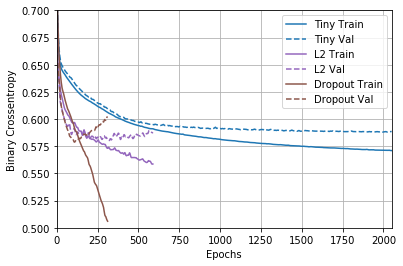

In [132]:
plotter.plot(regularizer_histories)
plt.ylim([0.5, 0.7])

It's clear from this plot that both of these regularization approaches improve the behavior of the "Large" model. But this still doesn't beat even the "Tiny" baseline.

Next try them both, together, and see if that does better.

### Combined L2 + dropout

In [133]:
combined_model = tf.keras.Sequential([
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu', input_shape=(FEATURES,)),
    layers.Dropout(0.5),
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(1)
])

regularizer_histories['combined'] = compile_and_fit(combined_model, "regularizers/combined")

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 512)               14848     
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 512)             

(0.5, 0.7)

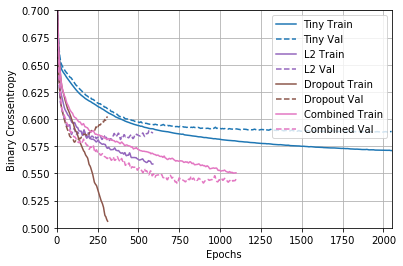

In [134]:
plotter.plot(regularizer_histories)
plt.ylim([0.5, 0.7])

This model with the "Combined" regularization is obviously the best one so far.

### Conclusions
To recap: here are the most common ways to prevent overfitting in neural networks:

- Get more training data.
- Reduce the capacity of the network.
- Add weight regularization.
- Add dropout.

Two important approaches not covered in this guide are:

- data-augmentation
- batch normalization

Remember that each method can help on its own, but often combining them can be even more effective.

## Load images

This tutorial shows how to load and preprocess an image dataset in three ways. First, you will use high-level Keras preprocessing utilities and layers to read a directory of images on disk. Next, you will write your own input pipeline from scratch using tf.data. Finally, you will download a dataset from the large catalog available in TensorFlow Datasets.

### Setup

In [49]:
!pip install tensorflow_datasets

  Stored in directory: C:\Users\Wisnu\AppData\Local\pip\Cache\wheels\19\49\34\c3c1e78bcb954c49e5ec0d31784fe63d14d427f316b12fbde9
Successfully built promise


In [3]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [136]:
tf.__version__

'2.4.1'

### Download the flowers dataset
This tutorial uses a dataset of several thousand photos of flowers. The flowers dataset contains 5 sub-directories, one per class:

In [3]:
# flowers_photos/
#   daisy/
#   dandelion/
#   roses/
#   sunflowers/
#   tulips/

In [4]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='flower_photos', 
                                   untar=True)
# data_dir = pathlib.Path(data_dir)

In [5]:
print(data_dir)

C:\Users\Wisnu\.keras\datasets\flower_photos


In [21]:
data_dir

'C:\\Users\\Wisnu\\.keras\\datasets\\flower_photos'

In [22]:
type(data_dir)

str

In [6]:
data_dir = pathlib.Path(data_dir)

In [24]:
print(data_dir)

C:\Users\Wisnu\.keras\datasets\flower_photos


In [7]:
type(data_dir)

pathlib.WindowsPath

After downloading (218MB), you should now have a copy of the flower photos available. There are 3670 total images:

In [8]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [142]:
print(data_dir)

C:\Users\Wisnu\.keras\datasets\flower_photos


Each directory contains images of that type of flower. Here are some roses:

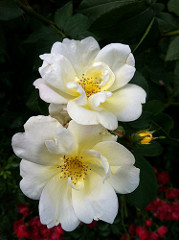

In [9]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

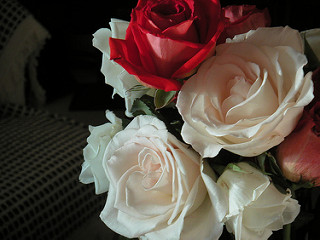

In [144]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[1]))

### Load using keras.preprocessing
*Let's load these images off disk using image_dataset_from_directory*.

#### Create a dataset
Define some parameters for the loader:

In [10]:
batch_size = 32
img_height = 180
img_width = 180

It's good practice to use a validation split when developing your model. We will use 80% of the images for training, and 20% for validation.

In [146]:
data_dir

WindowsPath('C:/Users/Wisnu/.keras/datasets/flower_photos')

In [147]:
print(data_dir)

C:\Users\Wisnu\.keras\datasets\flower_photos


In [11]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [12]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [13]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [151]:
type(train_ds)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [152]:
train_ds

<BatchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>

### Visualize the data
Here are the first 9 images from the training dataset.

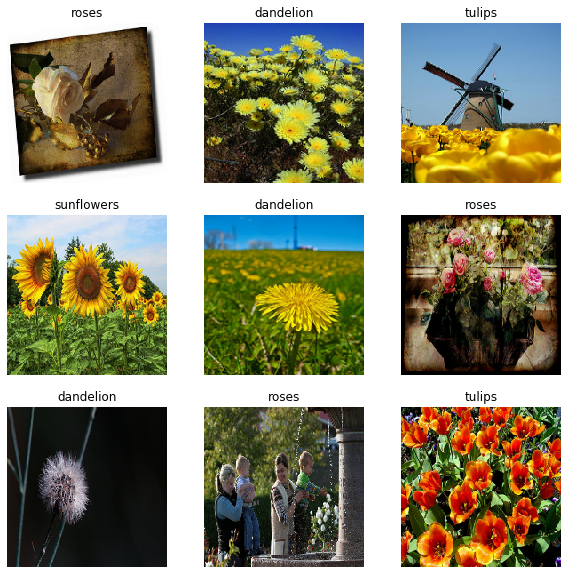

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

You can train a model using these datasets by passing them to model.fit (shown later in this tutorial). If you like, you can also manually iterate over the dataset and retrieve batches of images:

In [154]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension referes to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

### Standardize the data
The RGB channel values are in the [0, 255] range. This is not ideal for a neural network; in general you should seek to make your input values small. Here, we will standardize values to be in the [0, 1] by using a Rescaling layer.

In [155]:
from tensorflow.keras import layers

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

There are two ways to use this layer. You can apply it to the dataset by calling map:

In [156]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.96902645


Or, you can include the layer inside your model definition to simplify deployment. We will use the second approach here.

If you would like to scale pixel values to [-1,1] you can instead write Rescaling(1./127.5, offset=-1).

### Configure the dataset for performance
Let's make sure to use buffered prefetching so we can yield data from disk without having I/O become blocking. These are two important methods you should use when loading data.

.cache() keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache.

.prefetch() overlaps data preprocessing and model execution while training.

Interested readers can learn more about both methods, as well as how to cache data to disk in the data performance guide.

In [157]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Train a model
For completeness, we will show how to train a simple model using the datasets we just prepared. This model has not been tuned in any way - the goal is to show you the mechanics using the datasets you just created.

In [158]:
num_classes = 5

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [159]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [160]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
92/92 [==============================] - ETA: 2:45 - loss: 1.6492 - accuracy: 0.12 - ETA: 45s - loss: 1.7197 - accuracy: 0.1484 - ETA: 45s - loss: 1.7203 - accuracy: 0.161 - ETA: 46s - loss: 1.7093 - accuracy: 0.175 - ETA: 44s - loss: 1.7028 - accuracy: 0.181 - ETA: 43s - loss: 1.7000 - accuracy: 0.187 - ETA: 43s - loss: 1.6959 - accuracy: 0.193 - ETA: 42s - loss: 1.6918 - accuracy: 0.199 - ETA: 41s - loss: 1.6876 - accuracy: 0.205 - ETA: 40s - loss: 1.6834 - accuracy: 0.212 - ETA: 39s - loss: 1.6790 - accuracy: 0.218 - ETA: 39s - loss: 1.6743 - accuracy: 0.224 - ETA: 38s - loss: 1.6706 - accuracy: 0.228 - ETA: 38s - loss: 1.6667 - accuracy: 0.232 - ETA: 37s - loss: 1.6627 - accuracy: 0.237 - ETA: 37s - loss: 1.6586 - accuracy: 0.241 - ETA: 37s - loss: 1.6550 - accuracy: 0.245 - ETA: 37s - loss: 1.6515 - accuracy: 0.248 - ETA: 36s - loss: 1.6479 - accuracy: 0.251 - ETA: 35s - loss: 1.6443 - accuracy: 0.254 - ETA: 34s - loss: 1.6407 - accuracy: 0.257 - ETA: 34s - loss: 1.6369 

92/92 [==============================] - ETA: 48s - loss: 0.9512 - accuracy: 0.625 - ETA: 45s - loss: 0.9683 - accuracy: 0.609 - ETA: 45s - loss: 0.9455 - accuracy: 0.611 - ETA: 44s - loss: 0.9341 - accuracy: 0.620 - ETA: 44s - loss: 0.9397 - accuracy: 0.621 - ETA: 43s - loss: 0.9413 - accuracy: 0.623 - ETA: 42s - loss: 0.9431 - accuracy: 0.625 - ETA: 43s - loss: 0.9439 - accuracy: 0.627 - ETA: 43s - loss: 0.9450 - accuracy: 0.628 - ETA: 42s - loss: 0.9453 - accuracy: 0.629 - ETA: 42s - loss: 0.9459 - accuracy: 0.628 - ETA: 41s - loss: 0.9453 - accuracy: 0.628 - ETA: 40s - loss: 0.9455 - accuracy: 0.627 - ETA: 39s - loss: 0.9453 - accuracy: 0.627 - ETA: 39s - loss: 0.9445 - accuracy: 0.626 - ETA: 38s - loss: 0.9440 - accuracy: 0.626 - ETA: 38s - loss: 0.9439 - accuracy: 0.626 - ETA: 37s - loss: 0.9436 - accuracy: 0.625 - ETA: 37s - loss: 0.9431 - accuracy: 0.624 - ETA: 37s - loss: 0.9429 - accuracy: 0.624 - ETA: 36s - loss: 0.9423 - accuracy: 0.624 - ETA: 36s - loss: 0.9413 - accuracy:

## Using tf.data for finer control
The above keras.preprocessing utilities are a convenient way to create a tf.data.Dataset from a directory of images. For finer grain control, you can write your own input pipeline using tf.data. This section shows how to do just that, beginning with the file paths from the zip we downloaded earlier.

In [22]:
list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'), shuffle=False)
list_ds = list_ds.shuffle(image_count, reshuffle_each_iteration=False)

In [23]:
for f in list_ds.take(5):
  print(f.numpy())

b'C:\\Users\\Wisnu\\.keras\\datasets\\flower_photos\\tulips\\2426849837_baefd9a518_n.jpg'
b'C:\\Users\\Wisnu\\.keras\\datasets\\flower_photos\\sunflowers\\9555824387_32b151e9b0_m.jpg'
b'C:\\Users\\Wisnu\\.keras\\datasets\\flower_photos\\daisy\\14087947408_9779257411_n.jpg'
b'C:\\Users\\Wisnu\\.keras\\datasets\\flower_photos\\roses\\17040847367_b54d05bf52.jpg'
b'C:\\Users\\Wisnu\\.keras\\datasets\\flower_photos\\dandelion\\5760890854_c3e009bc8a_n.jpg'


In [24]:
class_names = np.array(sorted([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"]))
print(class_names)

['daisy' 'dandelion' 'roses' 'sunflowers' 'tulips']


Split the dataset into train and validation:

In [25]:
val_size = int(image_count * 0.2)
train_ds = list_ds.skip(val_size)
val_ds = list_ds.take(val_size)

You can see the length of each dataset as follows:

In [26]:
print(tf.data.experimental.cardinality(train_ds).numpy())
print(tf.data.experimental.cardinality(val_ds).numpy())

2936
734


Write a short function that converts a file path to an (img, label) pair:

In [28]:
def get_label(file_path):
  # convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  one_hot = parts[-2] == class_names
  # Integer encode the label
  return tf.argmax(one_hot)

In [29]:
def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  # resize the image to the desired size
  return tf.image.resize(img, [img_height, img_width])

In [30]:
def process_path(file_path):
  label = get_label(file_path)
  # load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

Use Dataset.map to create a dataset of image, label pairs:

In [31]:
# Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
train_ds = train_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [32]:
for image, label in train_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (180, 180, 3)
Label:  1


### Configure dataset for performance
To train a model with this dataset you will want the data:

- To be well shuffled.
- To be batched.
- Batches to be available as soon as possible.

These features can be added using the tf.data API.

In [33]:
def configure_for_performance(ds):
  ds = ds.cache()
  ds = ds.shuffle(buffer_size=1000)
  ds = ds.batch(batch_size)
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds

train_ds = configure_for_performance(train_ds)
val_ds = configure_for_performance(val_ds)

### Visualize the data
You can visualize this dataset similarly to the one you created previously.

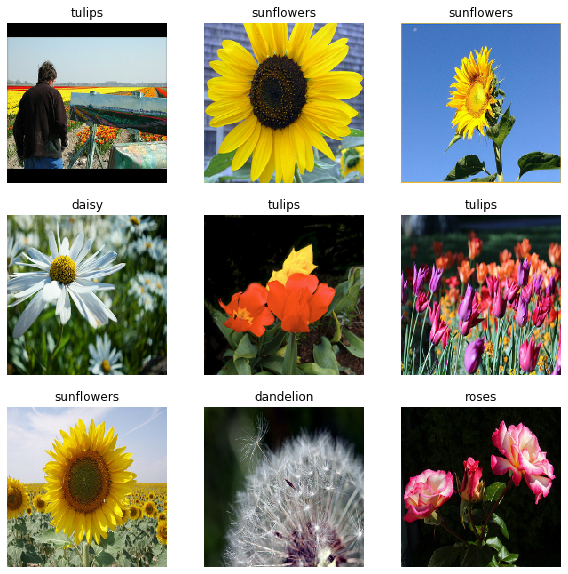

In [34]:
image_batch, label_batch = next(iter(train_ds))

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  label = label_batch[i]
  plt.title(class_names[label])
  plt.axis("off")

### Continue training the model
You have now manually built a similar tf.data.Dataset to the one created by the keras.preprocessing above. You can continue training the model with it. As before, we will train for just a few epochs to keep the running time short.

In [35]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
92/92 [==============================] - ETA: 21:43 - loss: 0.9060 - accuracy: 0.656 - ETA: 1:06 - loss: 0.8353 - accuracy: 0.718 - ETA: 1:07 - loss: 0.8521 - accuracy: 0.69 - ETA: 1:08 - loss: 0.8668 - accuracy: 0.67 - ETA: 1:09 - loss: 0.8457 - accuracy: 0.69 - ETA: 1:07 - loss: 0.8059 - accuracy: 0.70 - ETA: 1:06 - loss: 0.8087 - accuracy: 0.69 - ETA: 1:05 - loss: 0.8273 - accuracy: 0.67 - ETA: 1:04 - loss: 0.8314 - accuracy: 0.67 - ETA: 1:03 - loss: 0.8313 - accuracy: 0.67 - ETA: 1:02 - loss: 0.8128 - accuracy: 0.68 - ETA: 1:02 - loss: 0.8357 - accuracy: 0.67 - ETA: 1:01 - loss: 0.8276 - accuracy: 0.68 - ETA: 1:01 - loss: 0.8115 - accuracy: 0.68 - ETA: 1:00 - loss: 0.8053 - accuracy: 0.68 - ETA: 59s - loss: 0.8080 - accuracy: 0.6934 - ETA: 58s - loss: 0.8074 - accuracy: 0.683 - ETA: 57s - loss: 0.8112 - accuracy: 0.682 - ETA: 57s - loss: 0.8085 - accuracy: 0.680 - ETA: 56s - loss: 0.8120 - accuracy: 0.681 - ETA: 55s - loss: 0.8159 - accuracy: 0.681 - ETA: 55s - loss: 0.80

92/92 [==============================] - ETA: 8:40 - loss: 0.1819 - accuracy: 1.00 - ETA: 1:13 - loss: 0.2487 - accuracy: 0.93 - ETA: 1:10 - loss: 0.3080 - accuracy: 0.88 - ETA: 1:08 - loss: 0.3106 - accuracy: 0.89 - ETA: 1:08 - loss: 0.3187 - accuracy: 0.88 - ETA: 1:07 - loss: 0.3264 - accuracy: 0.88 - ETA: 1:05 - loss: 0.3621 - accuracy: 0.87 - ETA: 1:04 - loss: 0.3715 - accuracy: 0.86 - ETA: 1:04 - loss: 0.3661 - accuracy: 0.86 - ETA: 1:03 - loss: 0.3683 - accuracy: 0.86 - ETA: 1:03 - loss: 0.3648 - accuracy: 0.86 - ETA: 1:02 - loss: 0.3669 - accuracy: 0.86 - ETA: 1:01 - loss: 0.3532 - accuracy: 0.87 - ETA: 1:00 - loss: 0.3680 - accuracy: 0.86 - ETA: 59s - loss: 0.3548 - accuracy: 0.8708 - ETA: 58s - loss: 0.3567 - accuracy: 0.873 - ETA: 58s - loss: 0.3547 - accuracy: 0.873 - ETA: 57s - loss: 0.3625 - accuracy: 0.869 - ETA: 56s - loss: 0.3533 - accuracy: 0.873 - ETA: 55s - loss: 0.3487 - accuracy: 0.876 - ETA: 55s - loss: 0.3524 - accuracy: 0.872 - ETA: 54s - loss: 0.3508 - accuracy

### Next steps
This tutorial showed two ways of loading images off disk. First, you learned how to load and preprocess an image dataset using Keras preprocessing layers and utilities. Next, you learned how to write an input pipeline from scratch using tf.data. Finally, you learned how to download a dataset from TensorFlow Datasets.

## Data Augmentation

### Overview
This tutorial demonstrates data augmentation: a technique to increase the diversity of your training set by applying random (but realistic) transformations such as image rotation. You will learn how to apply data augmentation in two ways. First, you will use Keras Preprocessing Layers. Next, you will use tf.image.

### Setup

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

### Download a Dataset
This tutorial uses the tf_flowers dataset. For convenience, download the dataset using TensorFlow Datasets. If you would like to learn about others ways of importing data, see the load images tutorial.

In [3]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

KeyboardInterrupt: 